# Data Cleaning

In [1]:
# read the data and name the columns

import pandas as pd

file_path = '../data/raw/litigation_cases.xlsx'
df = pd.read_excel(file_path, header=5)

In [2]:
# index
df = df.set_index("LIT Leave Decision Date - Year")
df = df.sort_index()

In [3]:
# drop additional columns
df = df.iloc[:-7]

In [4]:
df.tail(10)

Country of Citizenship  \
LIT Leave Decision Date - Year                          
2023                                           Mexico   
2023                                         Pakistan   
2023                                            Libya   
2023                                            India   
2023                                          Namibia   
2023                                            India   
2023                                          Senegal   
2023                                           Uganda   
2023                                          Nigeria   
2023                                           Gambia   

                                          LIT Leave Decision Desc  \
LIT Leave Decision Date - Year                                      
2023                              Discontinued - Consent at Leave   
2023                                           Dismissed at Leave   
2023                            Discontinued - Withdrawn at Leave   
2023                                           Dismissed at Leave   
2023                                           Dismissed at Leave   
2023                            Discontinued - Withdrawn at Leave   
2023                              Discontinued - Consent at Leave   
2023                              Discontinued - Consent at Leave   
2023                              Discontinued - Consent at Leave   
2023                                           Dismissed at Leave   

                               LIT Case Type Group Desc  \
LIT Leave Decision Date - Year                            
2023                               Visa Officer Refusal   
2023                                      RAD Decisions   
2023                               Visa Officer Refusal   
2023                                      Removal Order   
2023                               Visa Officer Refusal   
2023                                      Removal Order   
2023                               Visa Officer Refusal   
2023                                      RAD Decisions   
2023                               Removal Arrangements   
2023                                      RAD Decisions   

                                            LIT Case Type Desc  \
LIT Leave Decision Date - Year                                   
2023                                     Visa Officer Decision   
2023                            RAD-Dismissed-Lack Jurisdictio   
2023                                     Visa Officer Decision   
2023                            Minister-Removal Order / Admin   
2023                                     Visa Officer Decision   
2023                             Minister-Other / Other Admin.   
2023                                     Visa Officer Decision   
2023                              RAD-Dismissed-Confirmed-Same   
2023                               A48-Removal Arrang.-Refusal   
2023                              RAD-Dismissed-Confirmed-Same   

                               LIT Filed By Desc LIT Tribunal Type Desc  \
LIT Leave Decision Date - Year                                            
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   
2023                            Person Concerned          Federal Court   

                               LIT Primary Office Type Desc  \
LIT Leave Decision Date - Year                     

# EDA

Getting a general idea of the data

### 1. Missing Value Check
   - The dataset does not contain any missing values across all columns, which ensure the data integrity for further analysis.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values


Country of Citizenship                    0
LIT Leave Decision Desc                   0
LIT Case Type Group Desc                  0
LIT Case Type Desc                        0
LIT Filed By Desc                         0
LIT Tribunal Type Desc                    0
LIT Primary Office Type Desc              0
LIT Primary Office Regional Group Desc    0
LIT Litigation Count                      0
dtype: int64

### 2. Data Types and Features
- The dataset contains 8 categorical columns and 1 numeric column, and the specific columns are listed below.
- Since the count of litigations should always be a whole number, the LIT Litigation Count column should be converted to an integer type from float64.

In [6]:
# Basic overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13781 entries, 2018 to 2023
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country of Citizenship                  13781 non-null  object 
 1   LIT Leave Decision Desc                 13781 non-null  object 
 2   LIT Case Type Group Desc                13781 non-null  object 
 3   LIT Case Type Desc                      13781 non-null  object 
 4   LIT Filed By Desc                       13781 non-null  object 
 5   LIT Tribunal Type Desc                  13781 non-null  object 
 6   LIT Primary Office Type Desc            13781 non-null  object 
 7   LIT Primary Office Regional Group Desc  13781 non-null  object 
 8   LIT Litigation Count                    13781 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB
None


In [7]:
# converting LIT Litigation Count to integer 
df['LIT Litigation Count'] = df['LIT Litigation Count'].astype(int)

### 2.1 For Categorical Features
- The table below shows the number of unique values for each categorical feature.
- For the distribution of Country of Citizenship, India leads with the highest count (947), followed by Nigeria (838) and the People's Republic of China (662).
- For LIT Leave Decision Desc, "Dismissed at Leave" is the most frequent category (6011), followed by "Allowed" (3148).
- LIT Case Type Group Desc highlights "RAD Decisions" (3403) and "Visa Officer Refusal" (2394) as the most common categories.
- The distribution of LIT Case Type Desc shows "RAD-Dismissed-Confirmed-Same" (2663) and "Visa Officer Decision" (2394) as the dominant types.
- In LIT Filed By Desc, "Person Concerned" leads with 13120 cases.
- LIT Tribunal Type Desc is dominated by "Federal Court" with 13672 entries.
- LIT Primary Office Type Desc has "Inland" as the most common type (8993).
- For LIT Primary Office Regional Group Desc, "Unspecified" (3071) is the highest, followed by "Enforcement and Intelligence Operations Division" (2320).

In [8]:
categorical_columns = df.select_dtypes(include='object').columns
unique_values = df[categorical_columns].nunique()
print(unique_values)

Country of Citizenship                    180
LIT Leave Decision Desc                     8
LIT Case Type Group Desc                   17
LIT Case Type Desc                         62
LIT Filed By Desc                           4
LIT Tribunal Type Desc                      4
LIT Primary Office Type Desc                3
LIT Primary Office Regional Group Desc     44
dtype: int64


Distribution for Country of Citizenship:
Country of Citizenship
India                         947
Nigeria                       838
People's Republic of China    662
Pakistan                      497
Mexico                        420
                             ... 
Macao SAR                       1
Bhutan                          1
Solomons, The                   1
Iceland                         1
Vanuatu                         1
Name: count, Length: 180, dtype: int64


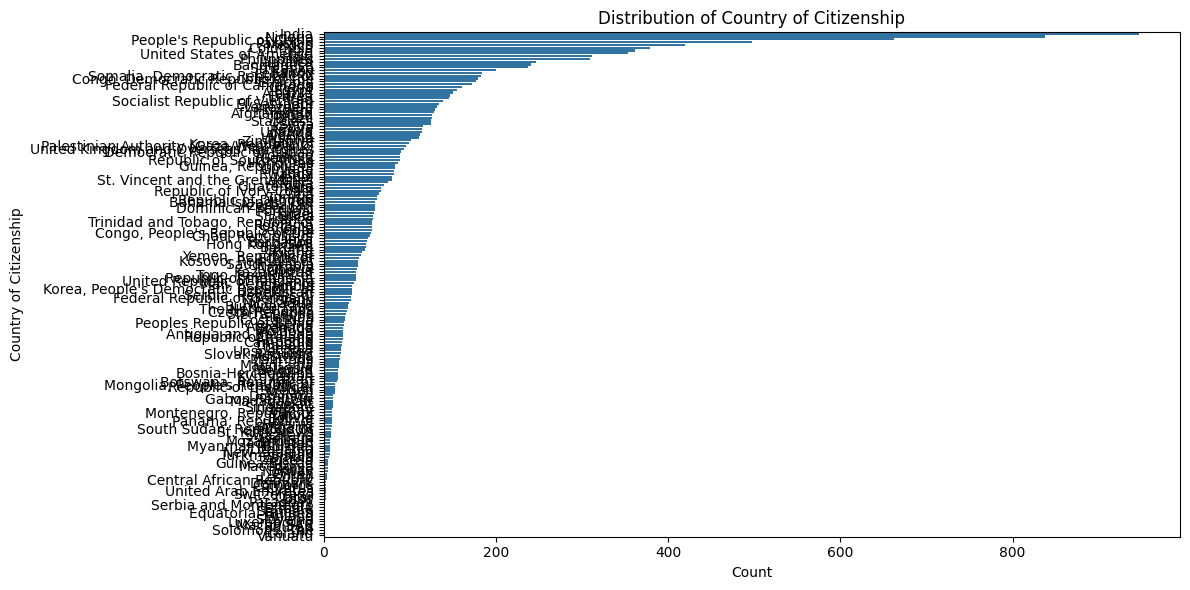

Distribution for LIT Leave Decision Desc:
LIT Leave Decision Desc
Dismissed at Leave                   6011
Allowed                              3148
Discontinued - Withdrawn at Leave    2861
Discontinued - Consent at Leave      1454
Allowed - Consent                     260
Not Started at Leave                   37
No Leave Required                       8
Leave Exception                         2
Name: count, dtype: int64


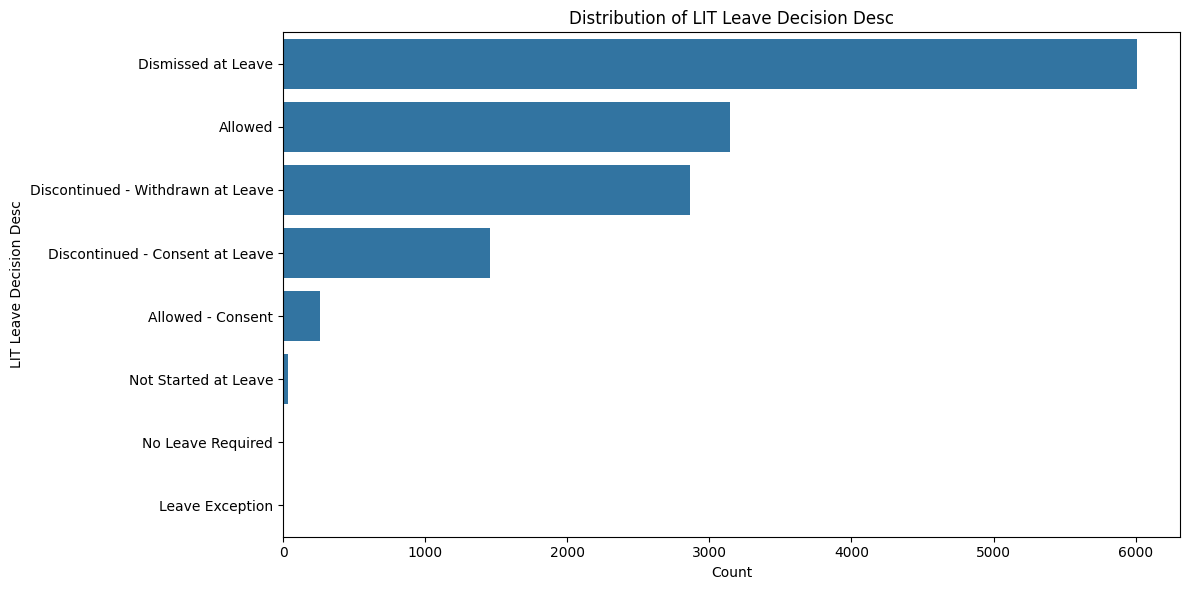

Distribution for LIT Case Type Group Desc:
LIT Case Type Group Desc
RAD Decisions           3403
Visa Officer Refusal    2394
Removal Order           1965
RPD Decisions           1741
HC Decisions            1091
PRRA                     963
Mandamus                 828
Removal Arrangements     568
IAD Decisions            441
ID Decisions             176
Other                     88
Refugee Eligibility       41
In-Canada Classes         35
Detention                 24
Citizenship Program       20
DFN                        2
Danger Opinions            1
Name: count, dtype: int64


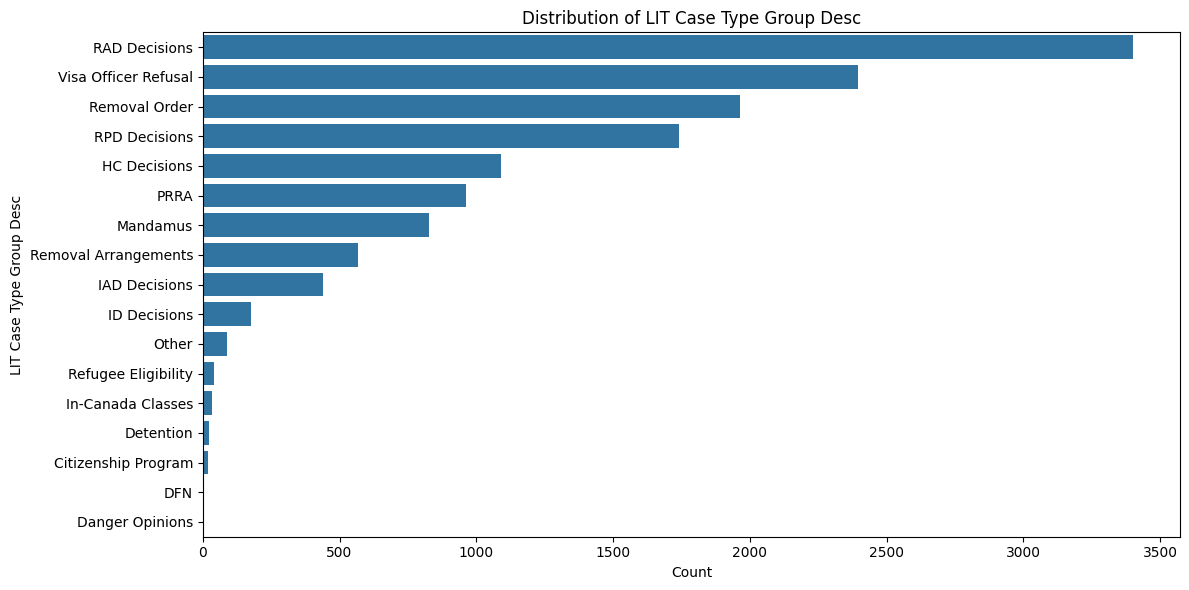

Distribution for LIT Case Type Desc:
LIT Case Type Desc
RAD-Dismissed-Confirmed-Same     2663
Visa Officer Decision            2394
Minister-Other / Other Admin.    1728
RPD-Not CR/Protected Person      1210
HC Refusal-Perm Res              1081
                                 ... 
Renunciation 9(1)-PS Decision       1
Adoption 5.1 - PS Decision          1
Minor Grant - PS Decision           1
ICLC-Spouse                         1
MO-To effect Removal Order of       1
Name: count, Length: 62, dtype: int64


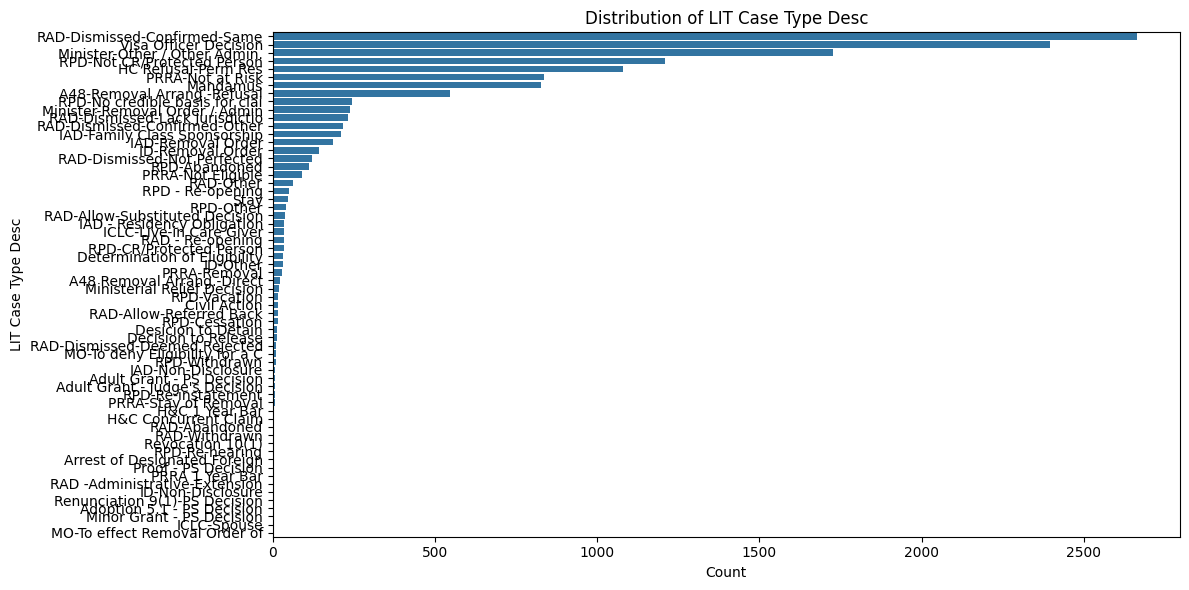

Distribution for LIT Filed By Desc:
LIT Filed By Desc
Person Concerned    13120
Third Party           451
Minister - CIC        154
Minister - CBSA        56
Name: count, dtype: int64


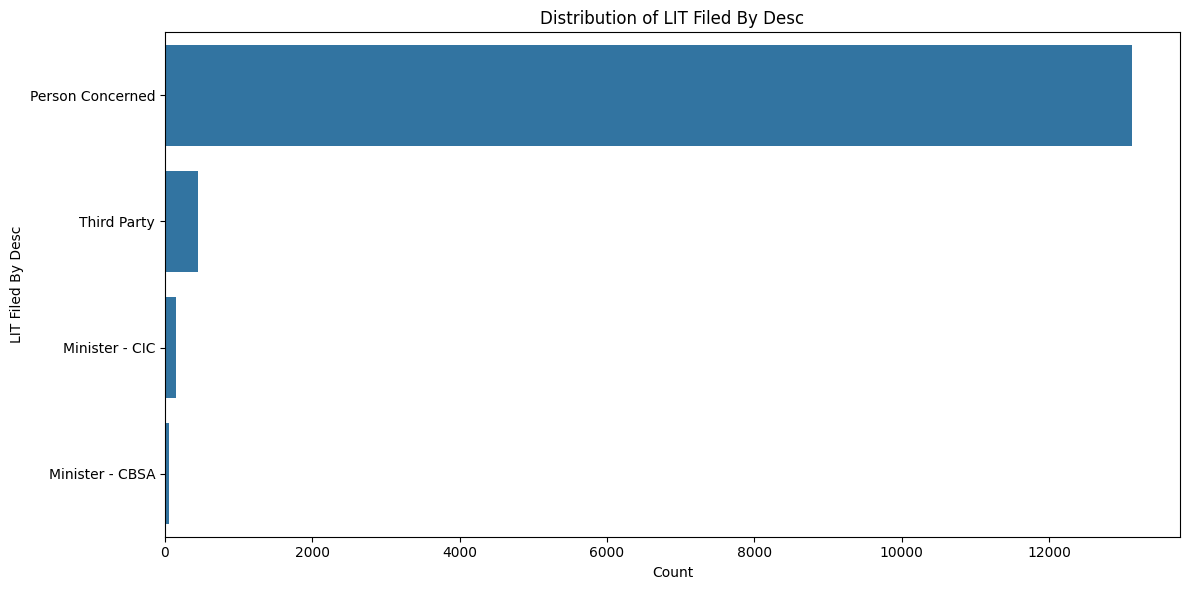

Distribution for LIT Tribunal Type Desc:
LIT Tribunal Type Desc
Federal Court              13672
Federal Court of Appeal       96
Supreme Court of Canada       12
UNHRC                          1
Name: count, dtype: int64


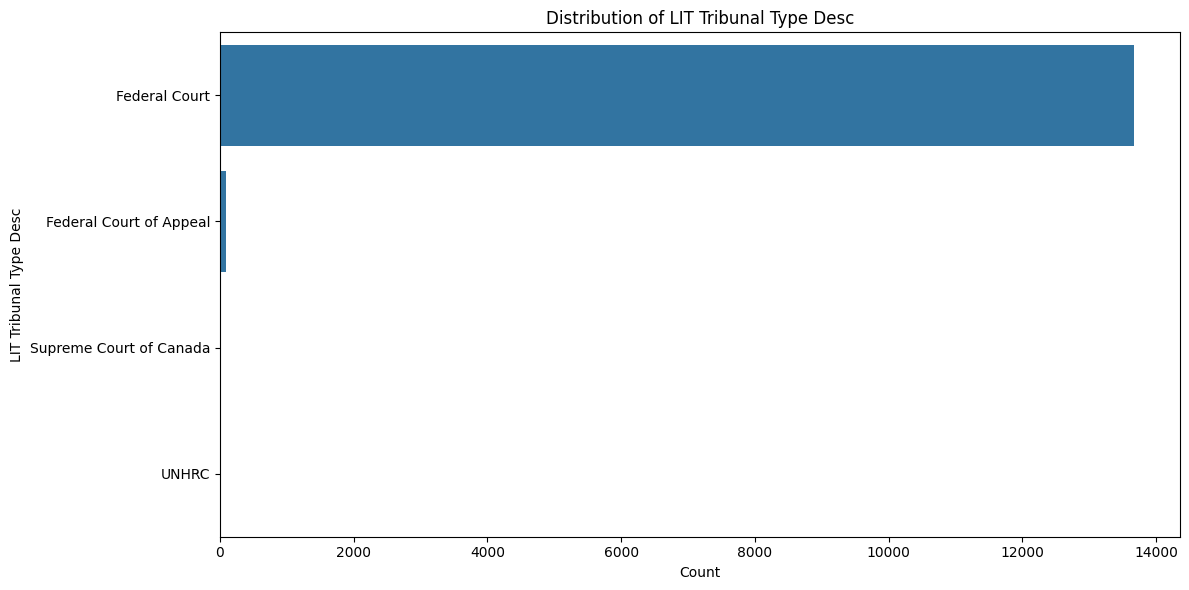

Distribution for LIT Primary Office Type Desc:
LIT Primary Office Type Desc
Inland                   8993
Port of Entry            2529
International Network    2259
Name: count, dtype: int64


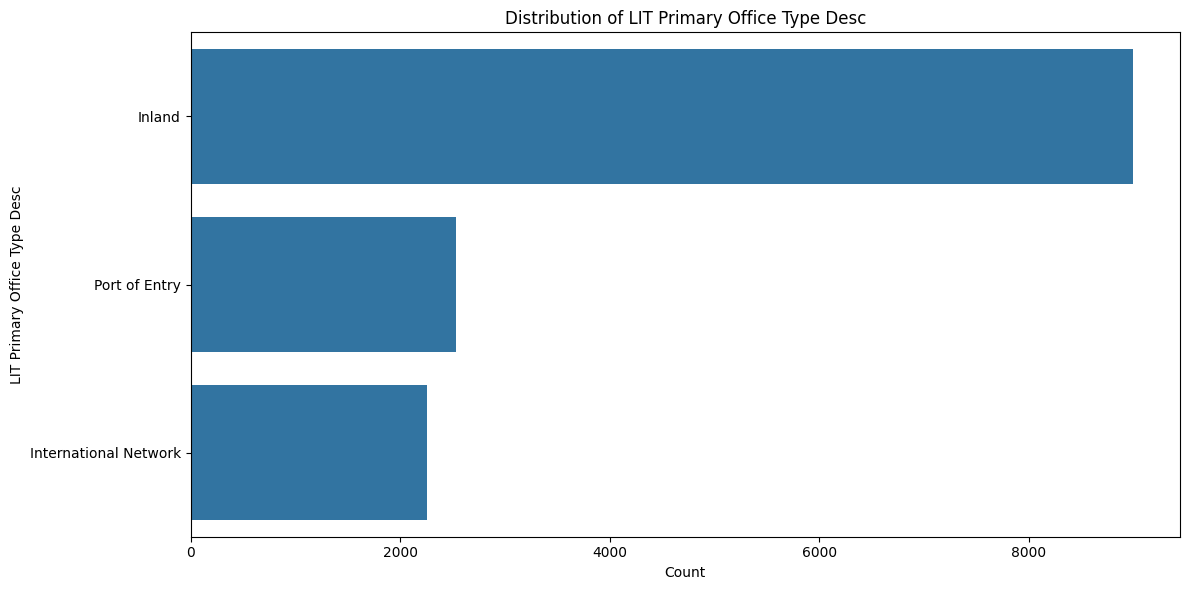

Distribution for LIT Primary Office Regional Group Desc:
LIT Primary Office Regional Group Desc
Unspecified                                                                   3071
Enforcement and Intelligence Operations Division                              2320
Humanitarian Migration and Integrity Division                                 2248
GTA West IRCC                                                                 1013
Montréal Facilitation Center                                                   712
Case Processing Centre Edmonton                                                611
Montérégie Border District                                                     581
Fort Erie District                                                             459
Passenger Operations District                                                  406
Regional HQ Prairies NT                                                        404
Ontario West Area                                                         

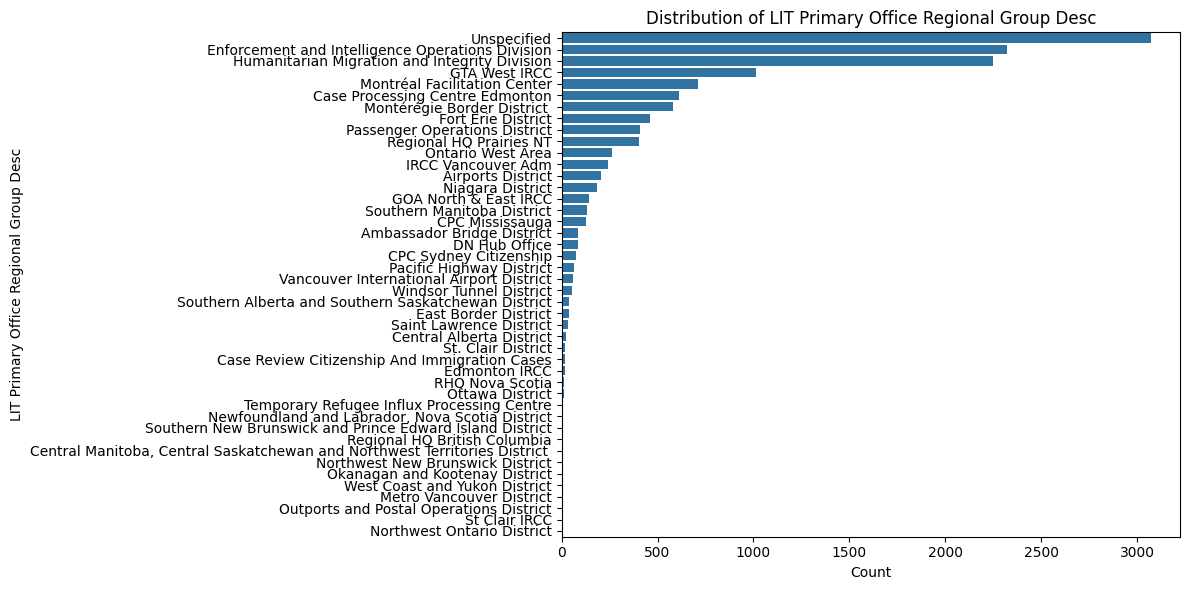

In [9]:
for column in categorical_columns:
    print(f"Distribution for {column}:")
    print(df[column].value_counts())
    plt.figure(figsize=(12, 6)) 
    sns.countplot(y=column, data=df, order=df[column].value_counts().index) 
    plt.title(f'Distribution of {column}') 
    plt.xlabel('Count')  
    plt.ylabel(column)  
    plt.tight_layout()  
    plt.show()

### 2.2 For Numerical Features:
- Most cases have relatively low litigation counts, but a few outliers show very high values.
- The presence of outliers suggests that there are cases with exceptional circumstances or rare events, which should be considered during analysis to avoid bias in interpretation.

In [10]:
numerical_columns = df.select_dtypes(include='number').columns
print(df[numerical_columns].describe())


       LIT Litigation Count
count          13781.000000
mean               3.505406
std               14.636497
min                1.000000
25%                1.000000
50%                1.000000
75%                3.000000
max              736.000000


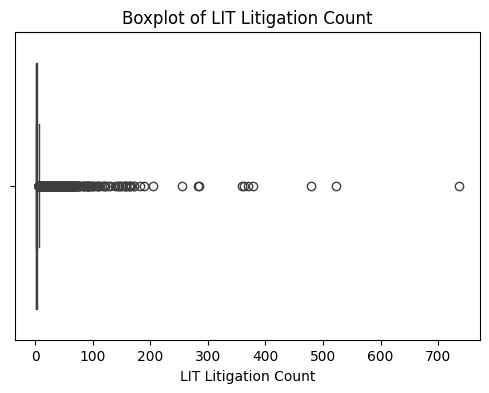

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


### 3. Correlation Between Features

- For the 'Country of Citizenship' column, filter for the top 10 most frequent countries to avoid clutter in the heatmap. For other categorical columns, analyze their relationships using cross-tabulation and visualize the results with heatmaps.
- The only numerical feature, 'LIT Litigation Count,' is analyzed in relation to categorical features using boxplots.
- Some insights into the relationship between LIT Case Type Desc and other features; for further insights into the rest of the features, please see the heatmap below:
  - Most cases are processed in the Federal Court, with certain case types (like RAD Decisions and Visa Officer Refusal) being more prominent in specific tribunals.
  - A large number of cases in categories like RAD Decisions and RPD Decisions result in "Dismissed at Leave" or "Discontinued - Withdrawn at Leave" decisions.
  - A large volume of cases are filed by the Minister-CBSA, particularly for RAD and RPD decisions.
  - "Inland" and "Port of Entry" are the primary locations for many case types, with "RAD Decisions" and "Visa Officer Refusal" cases being heavily concentrated in the "International Network" region.
  - The interrelation between various case types reveals that RAD Decisions and RPD Decisions are heavily interconnected with other types, particularly for "Removal Orders" and "Visa Officer Refusals."
  - A large portion of cases, particularly those under RAD Decisions and Visa Officer Refusal, are handled by the Federal Court.

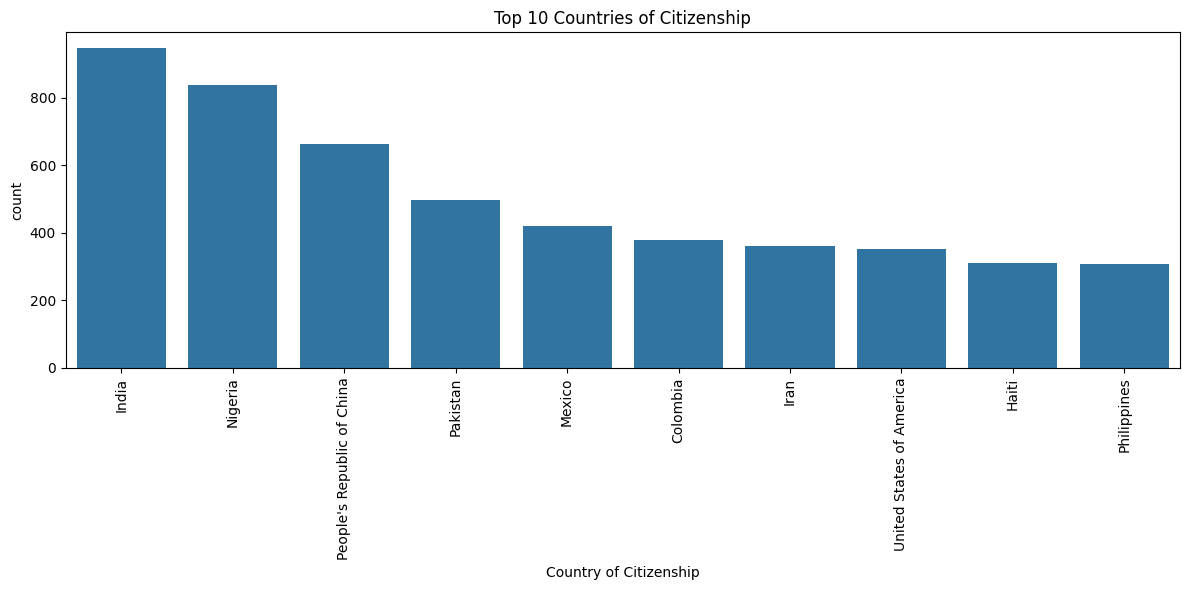

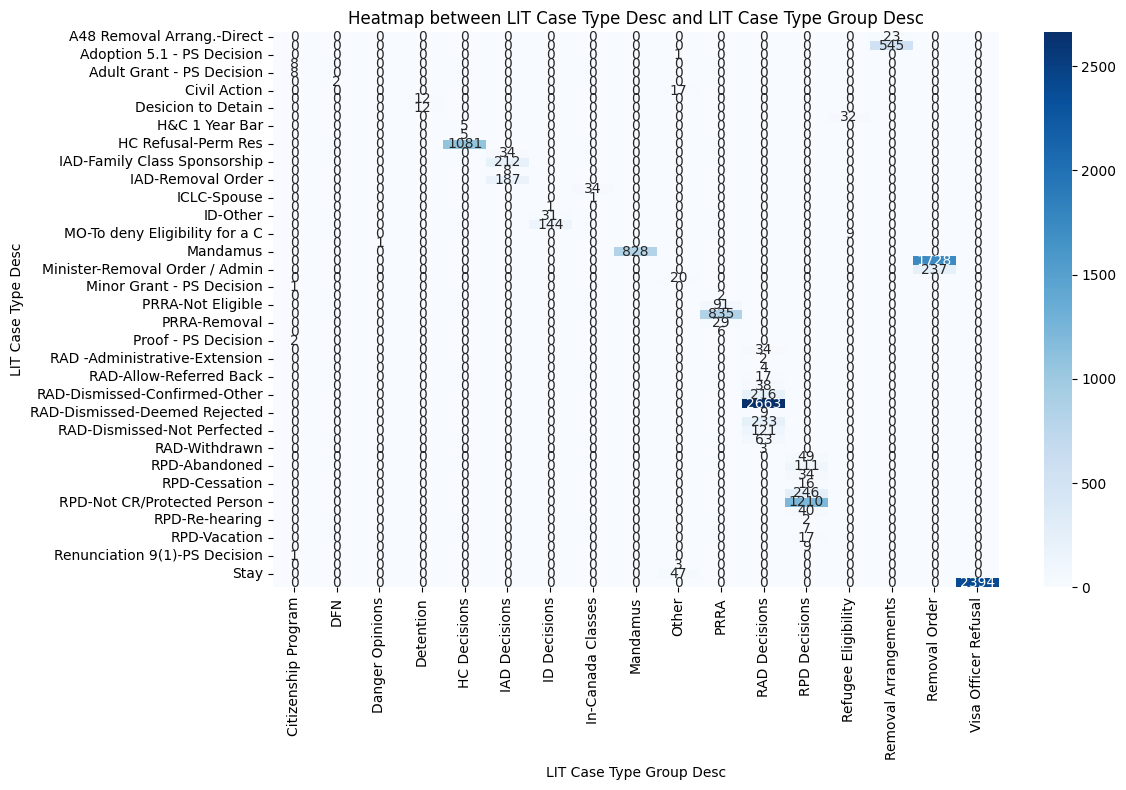

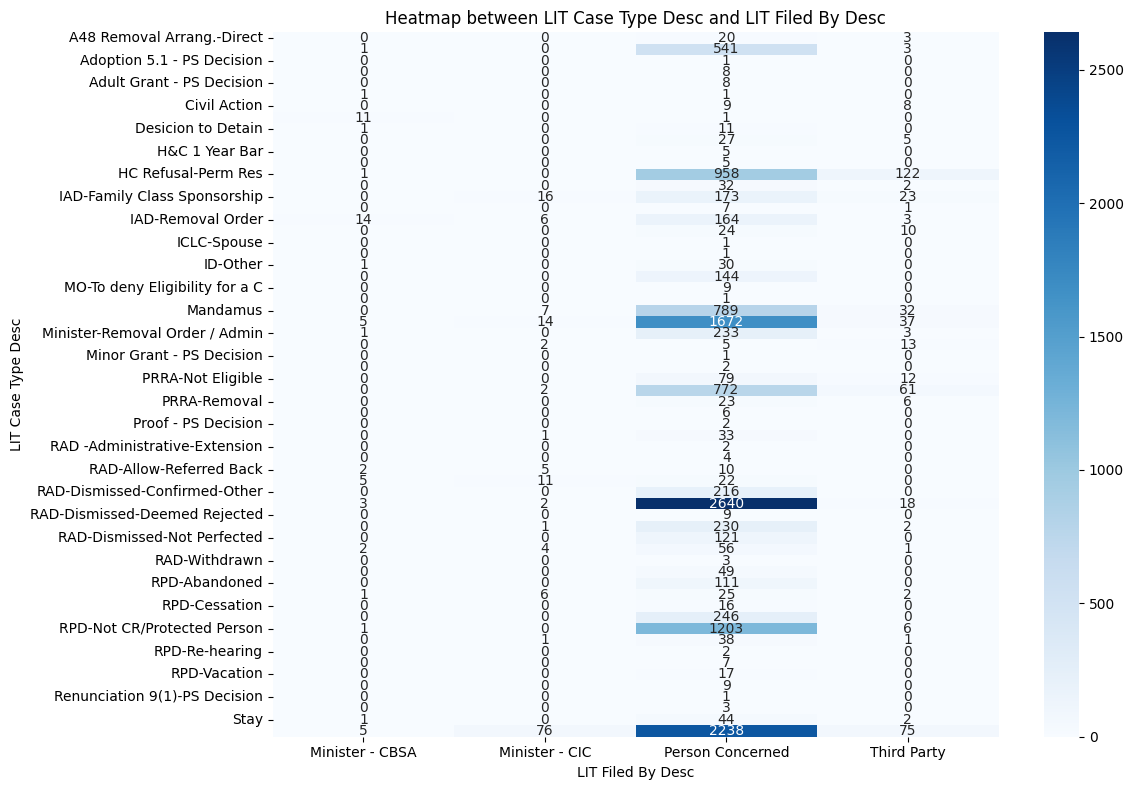

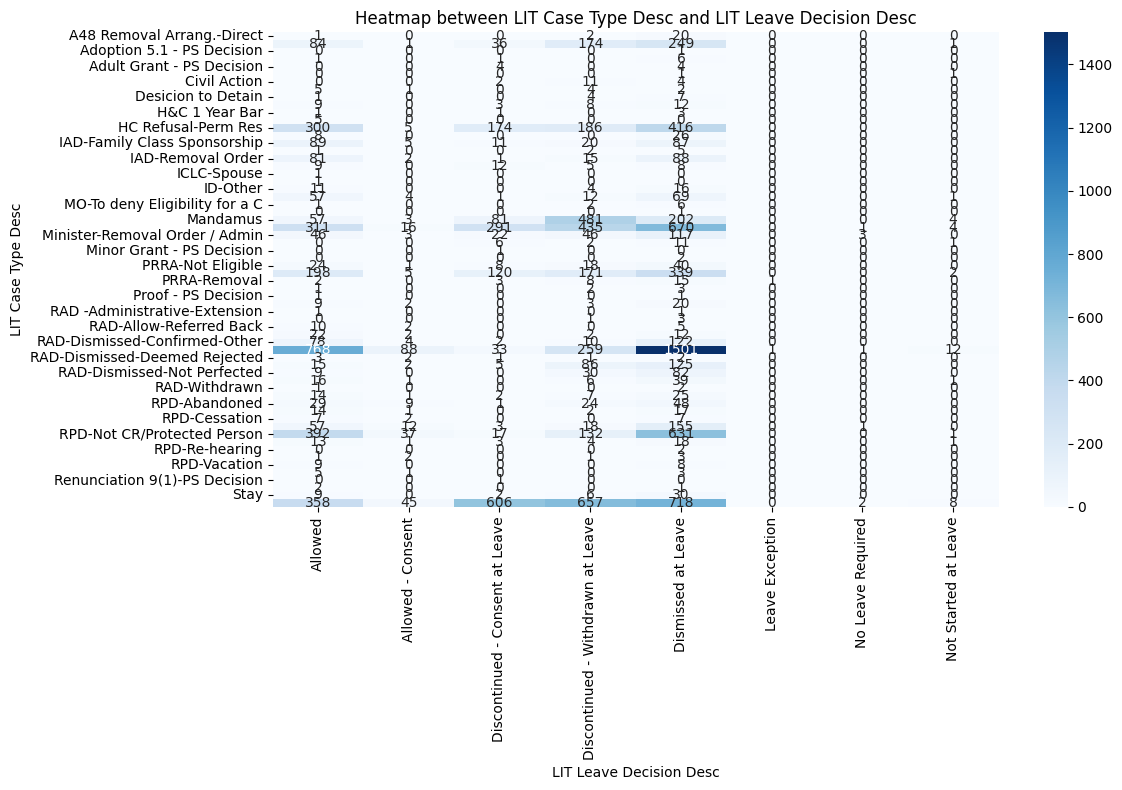

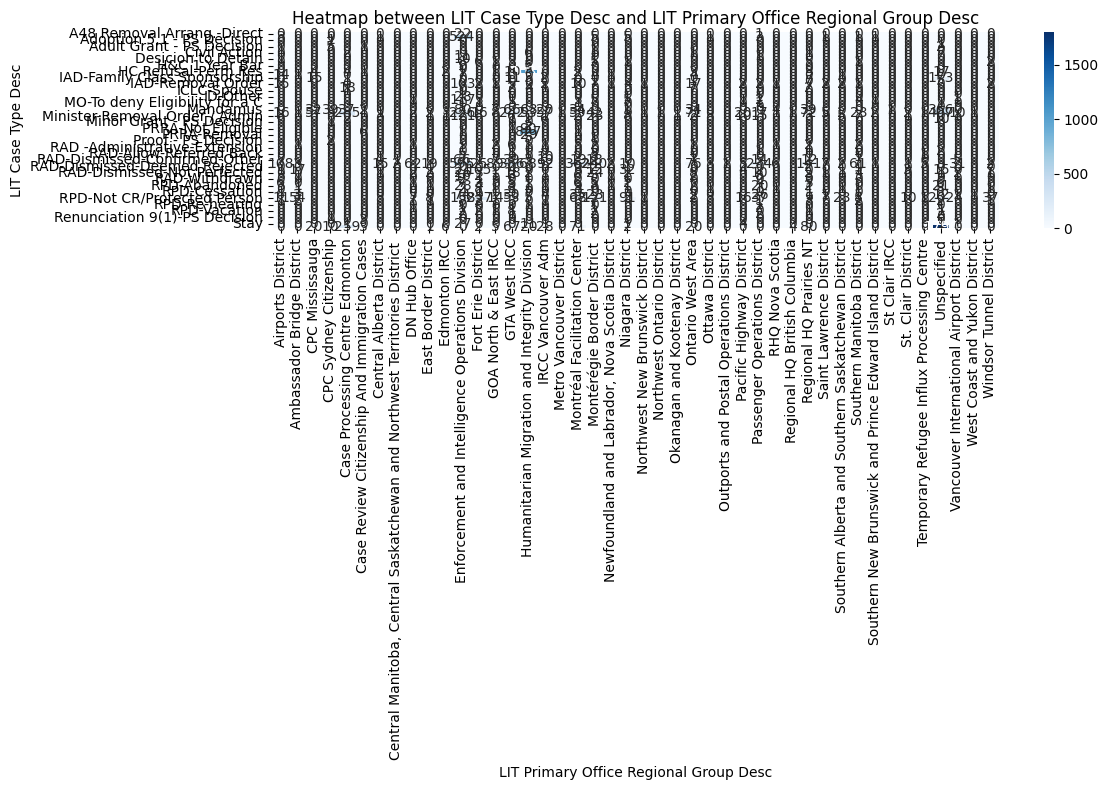

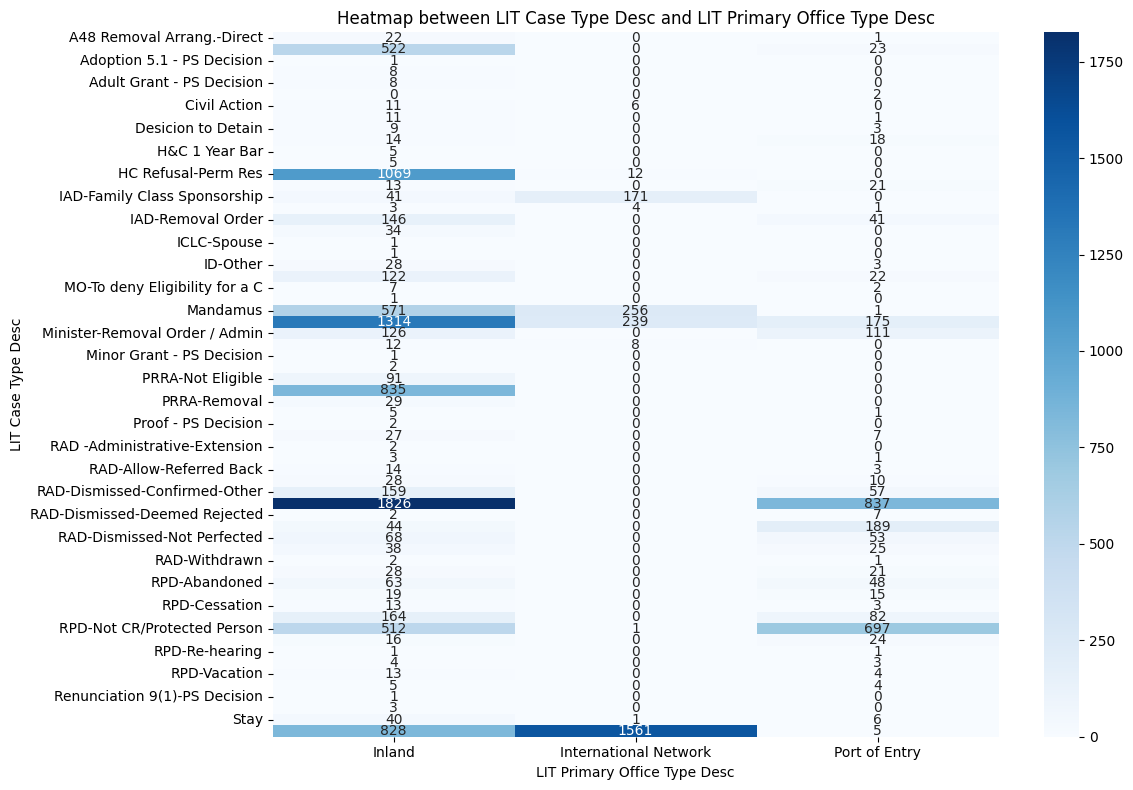

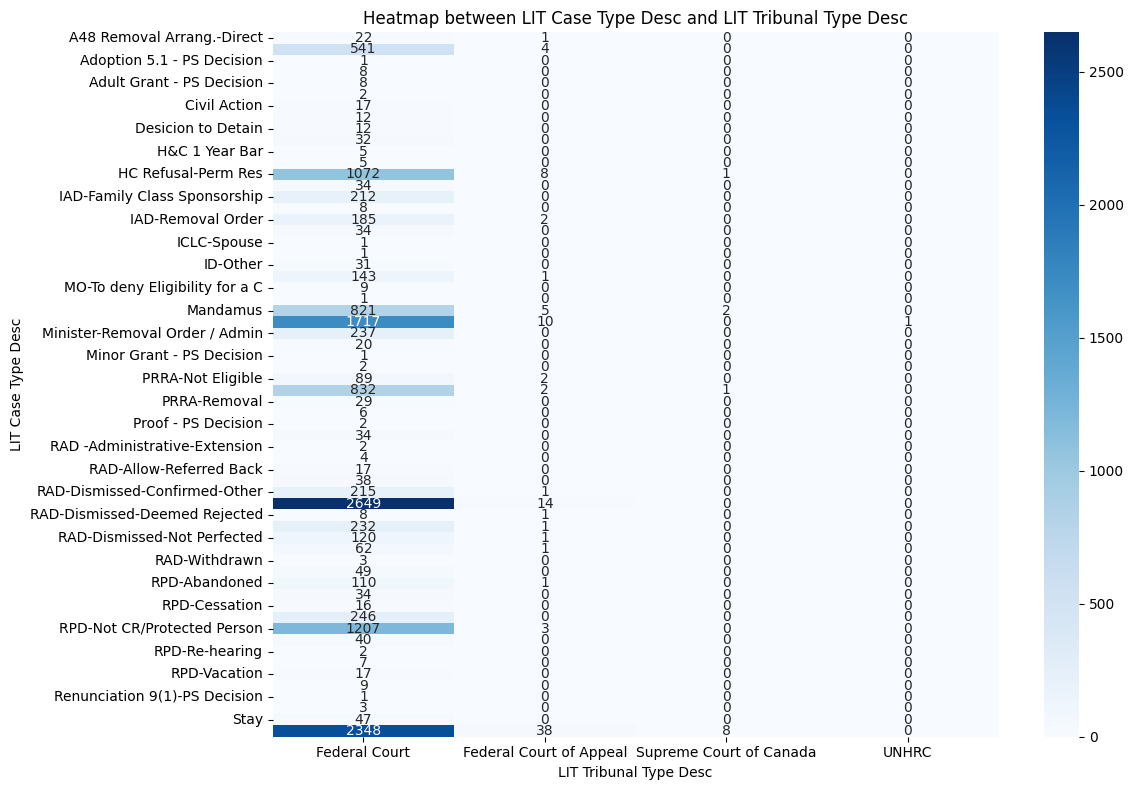

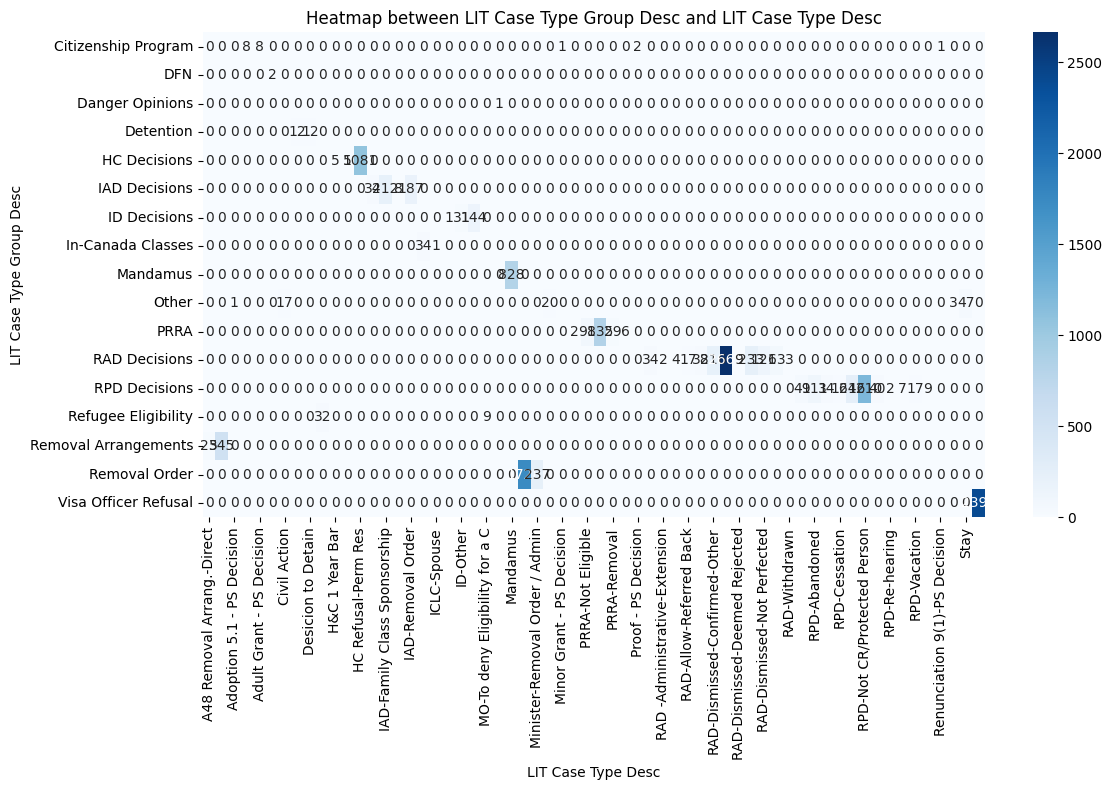

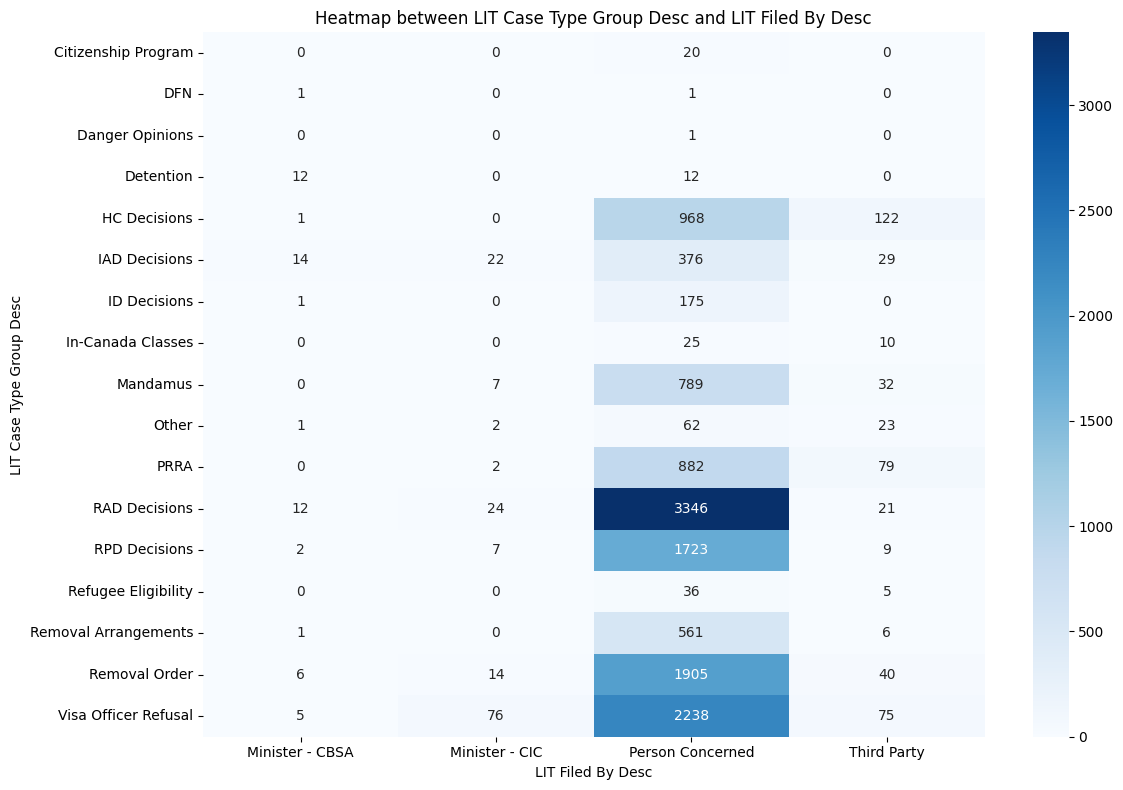

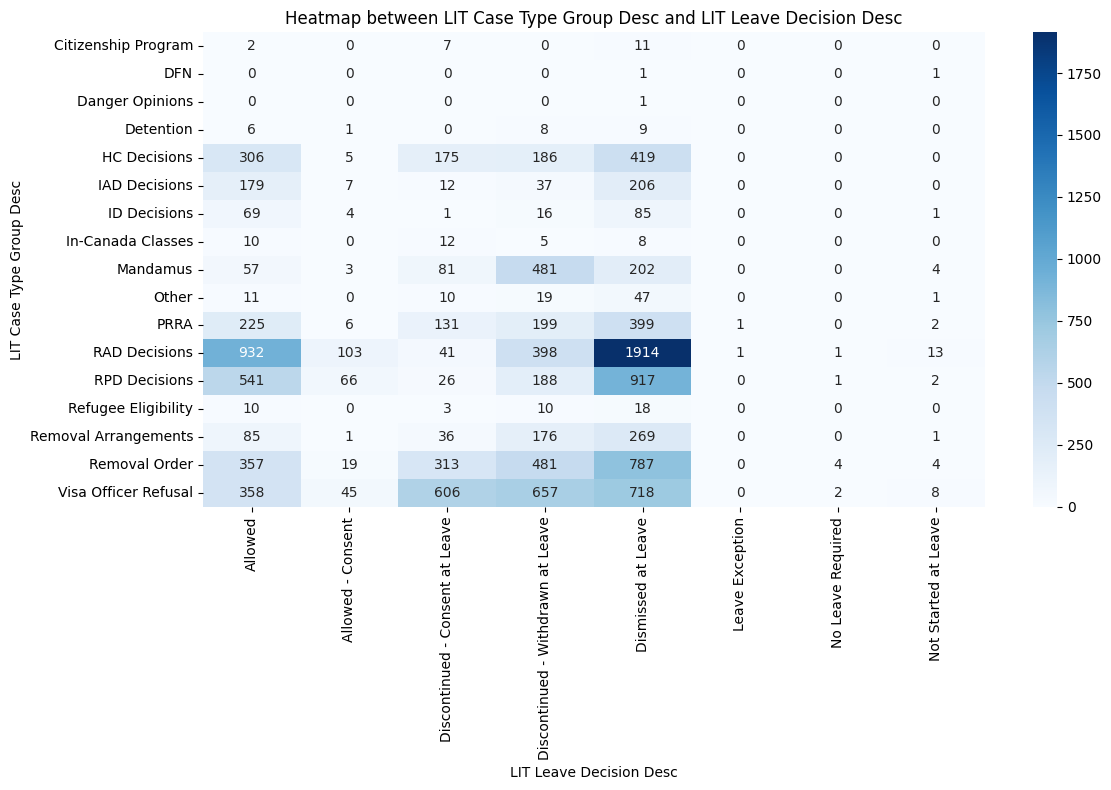

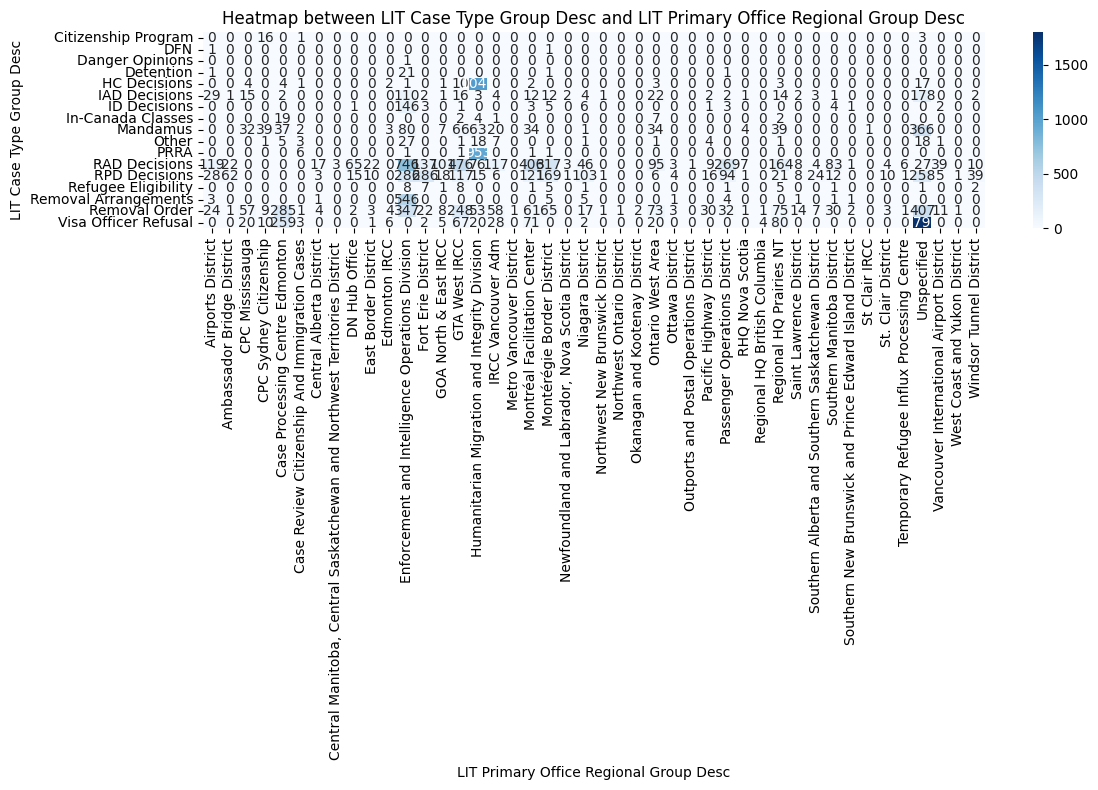

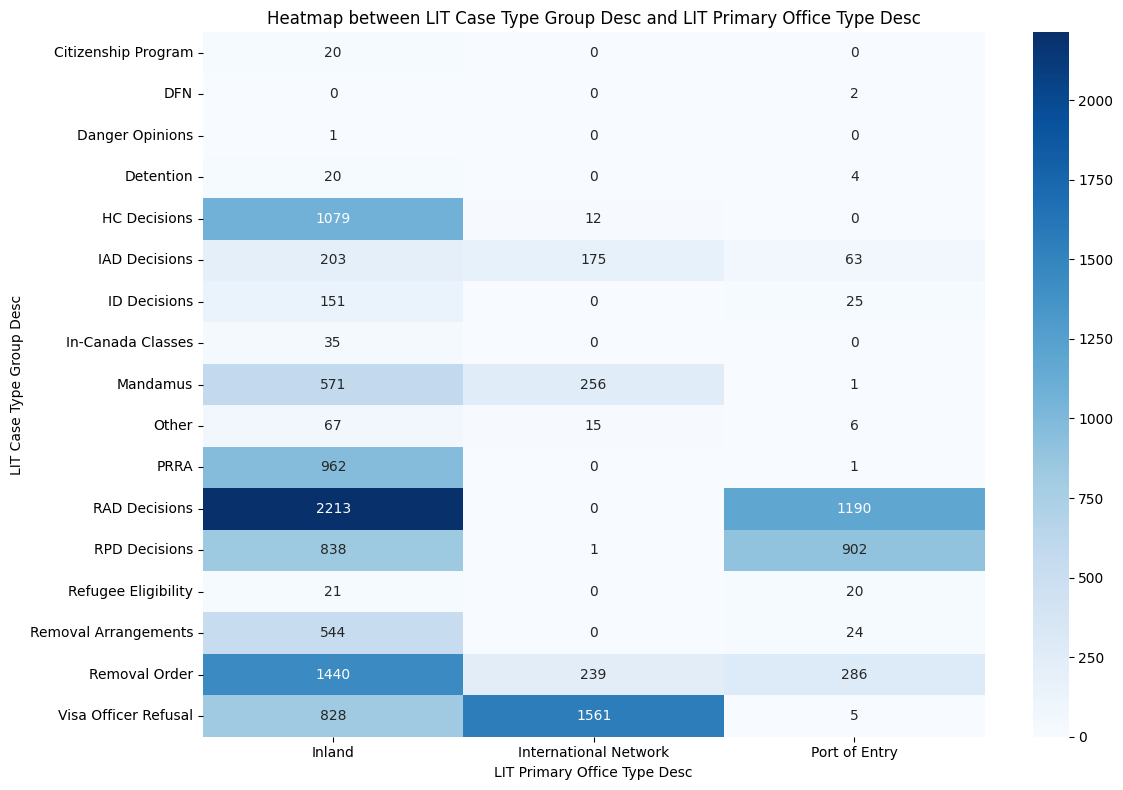

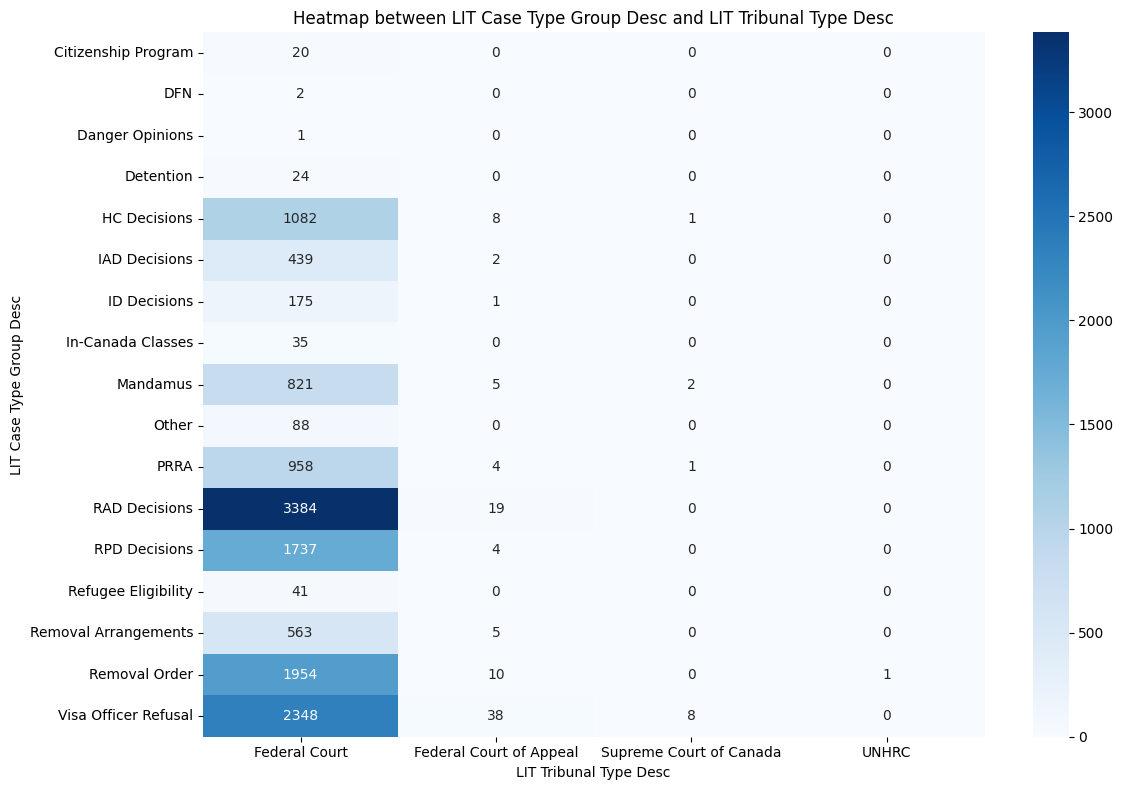

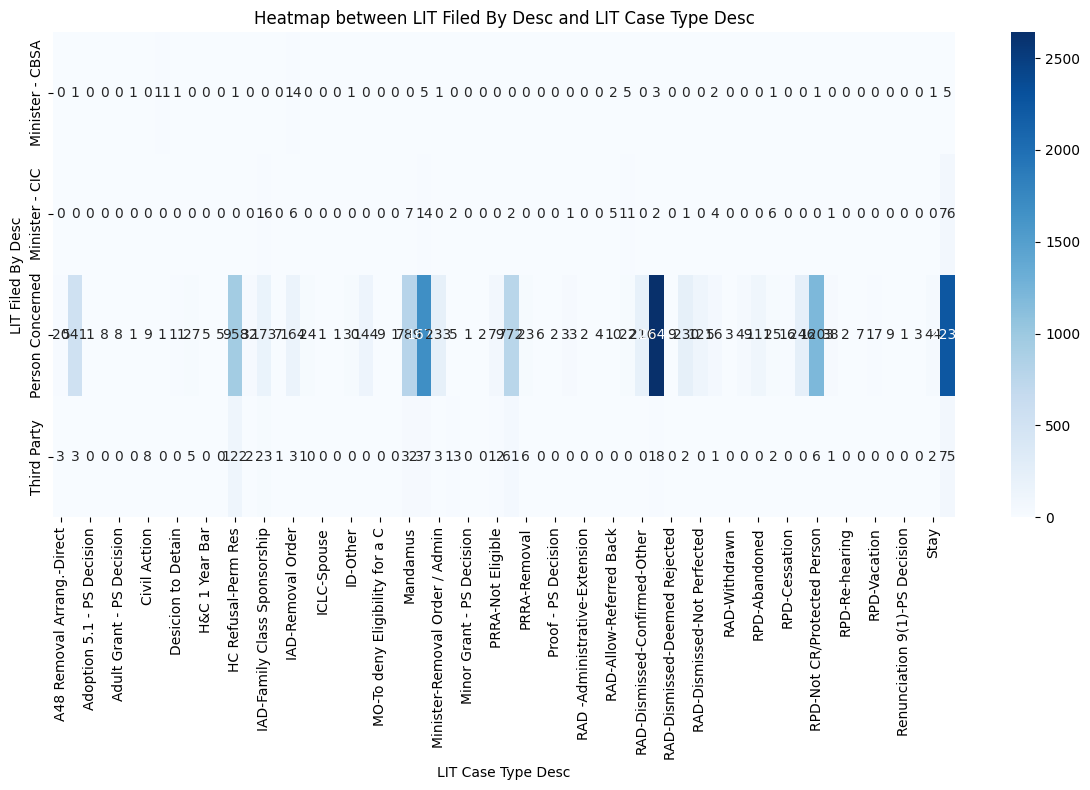

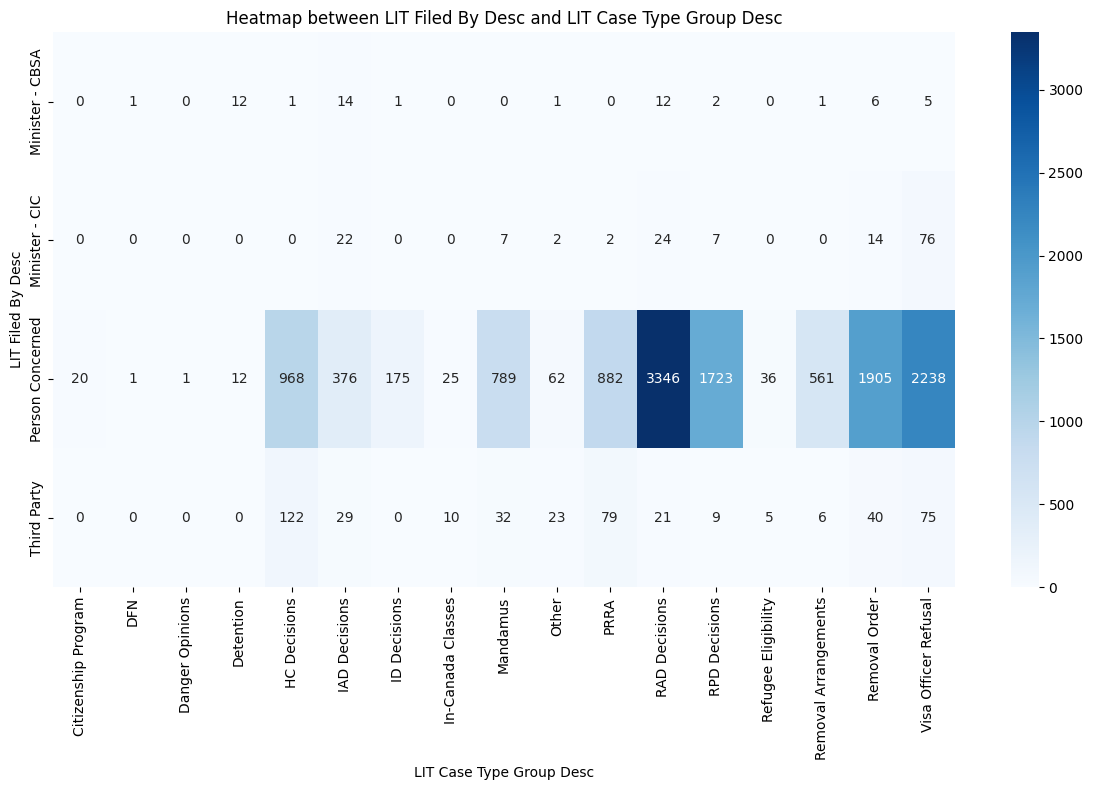

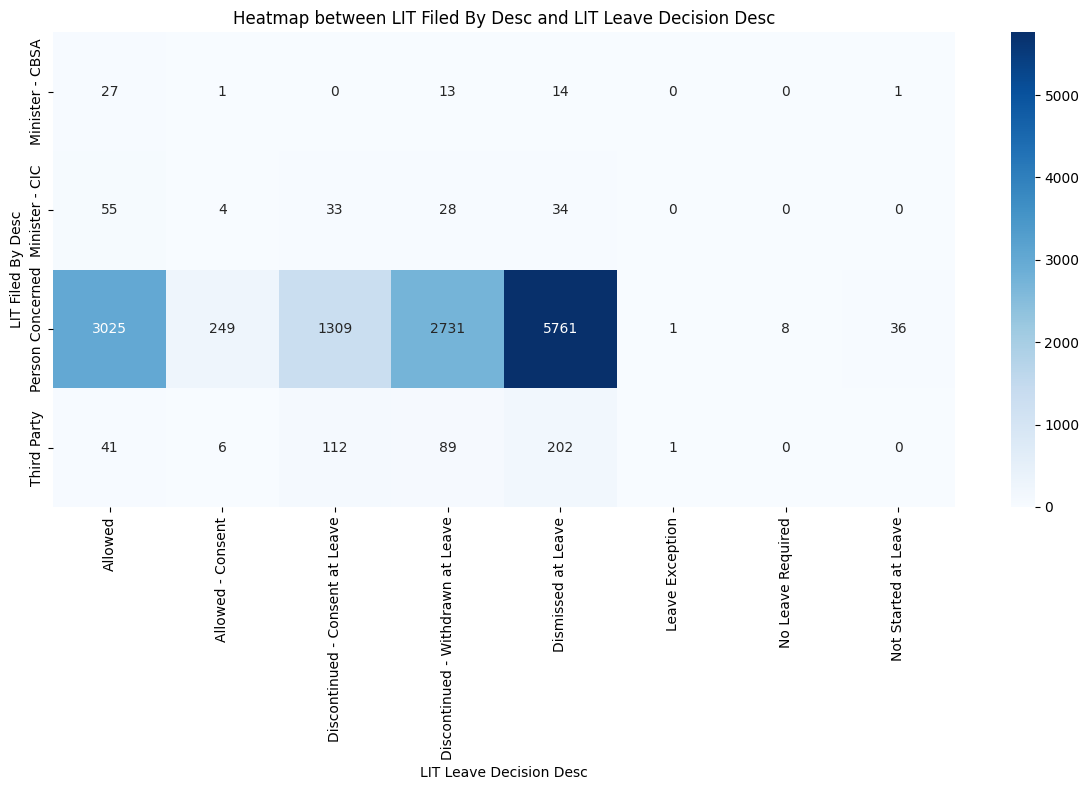

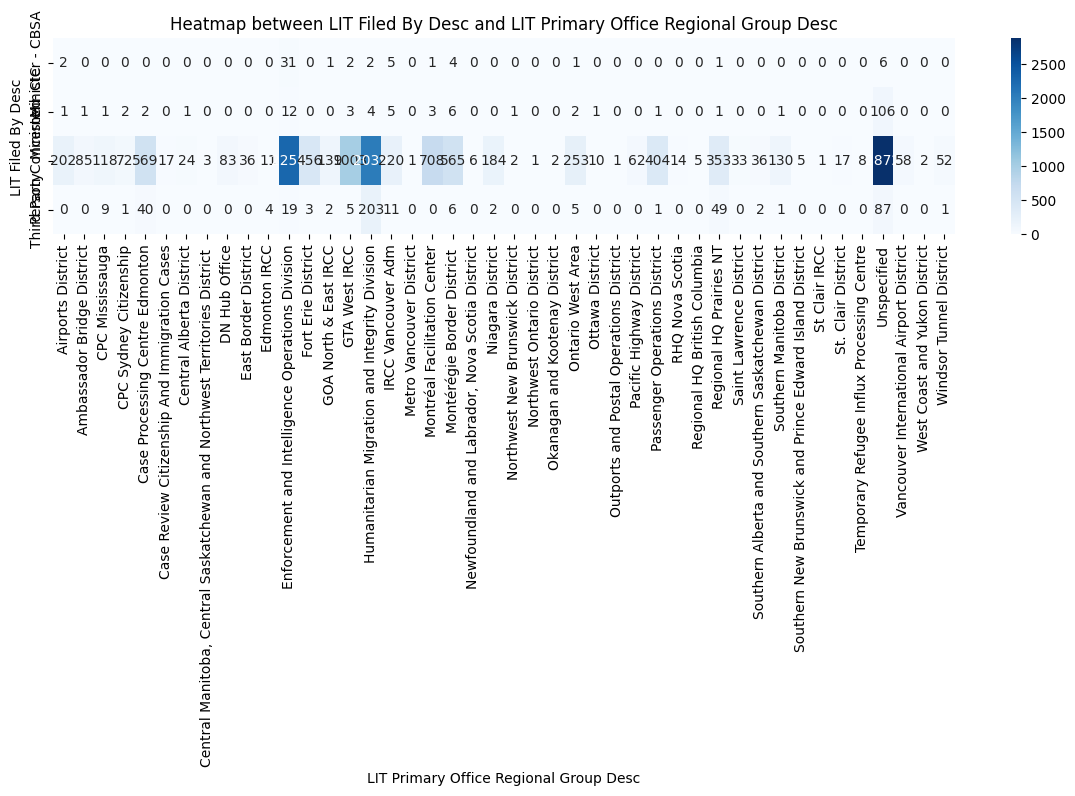

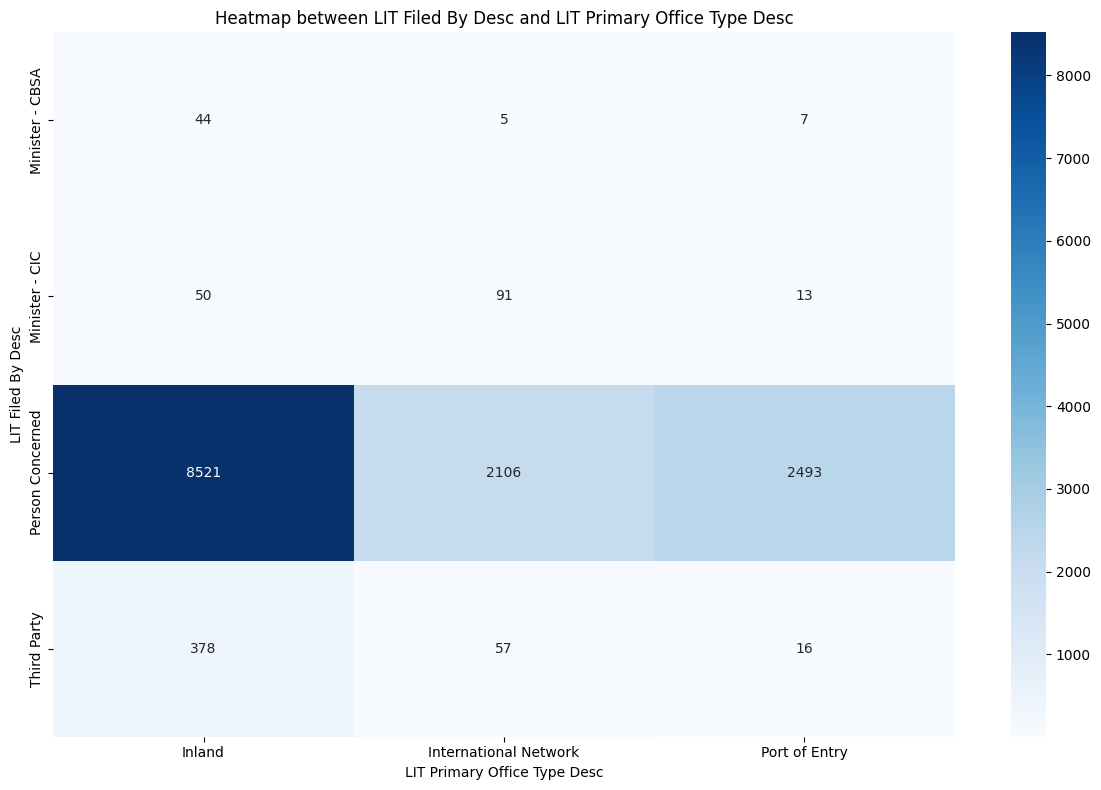

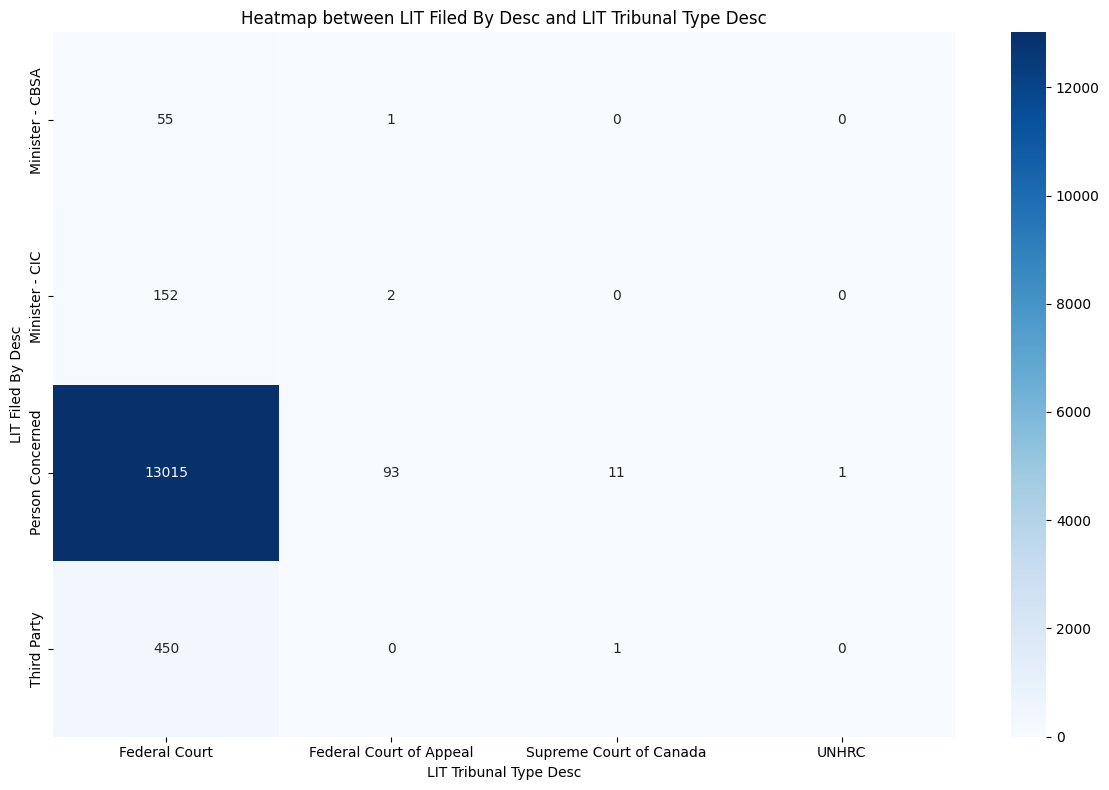

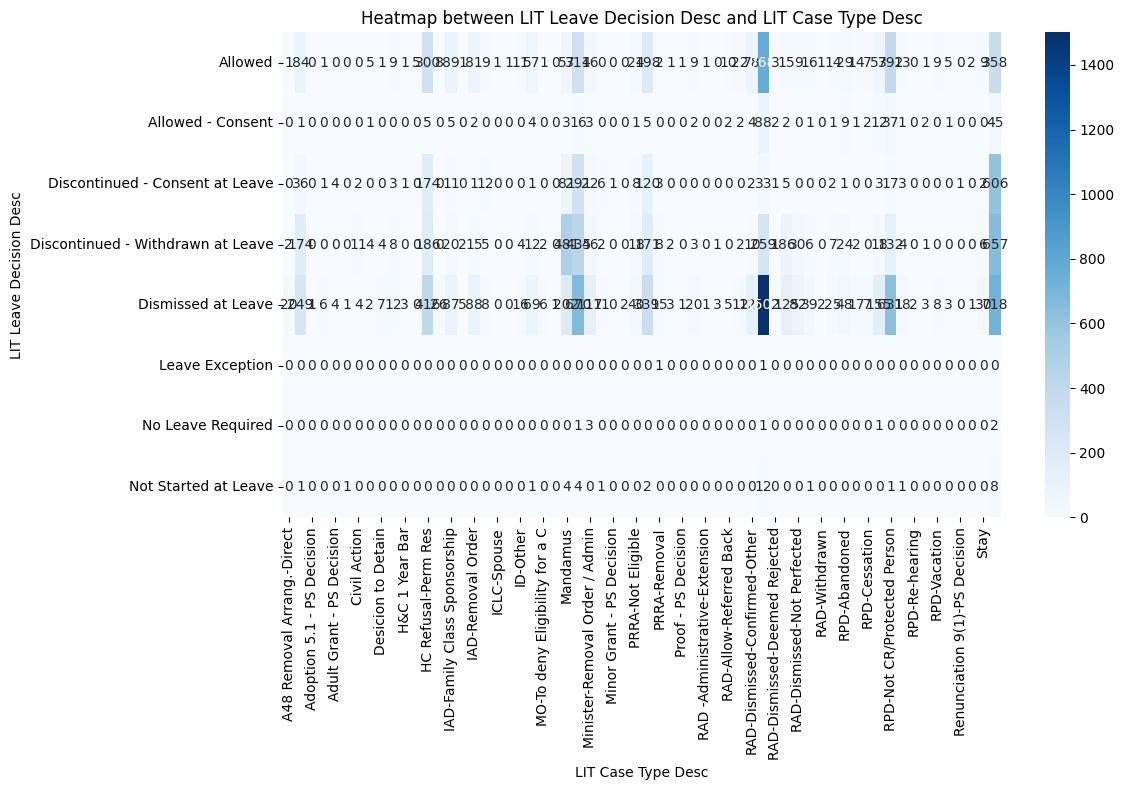

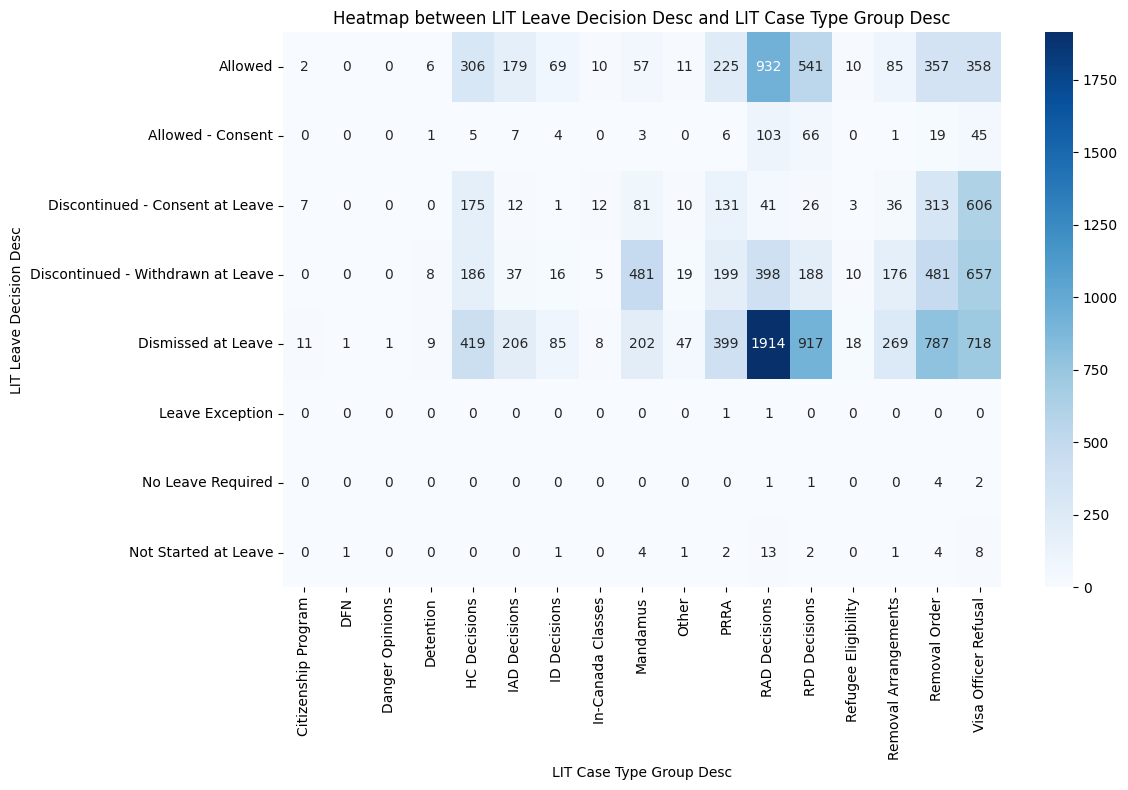

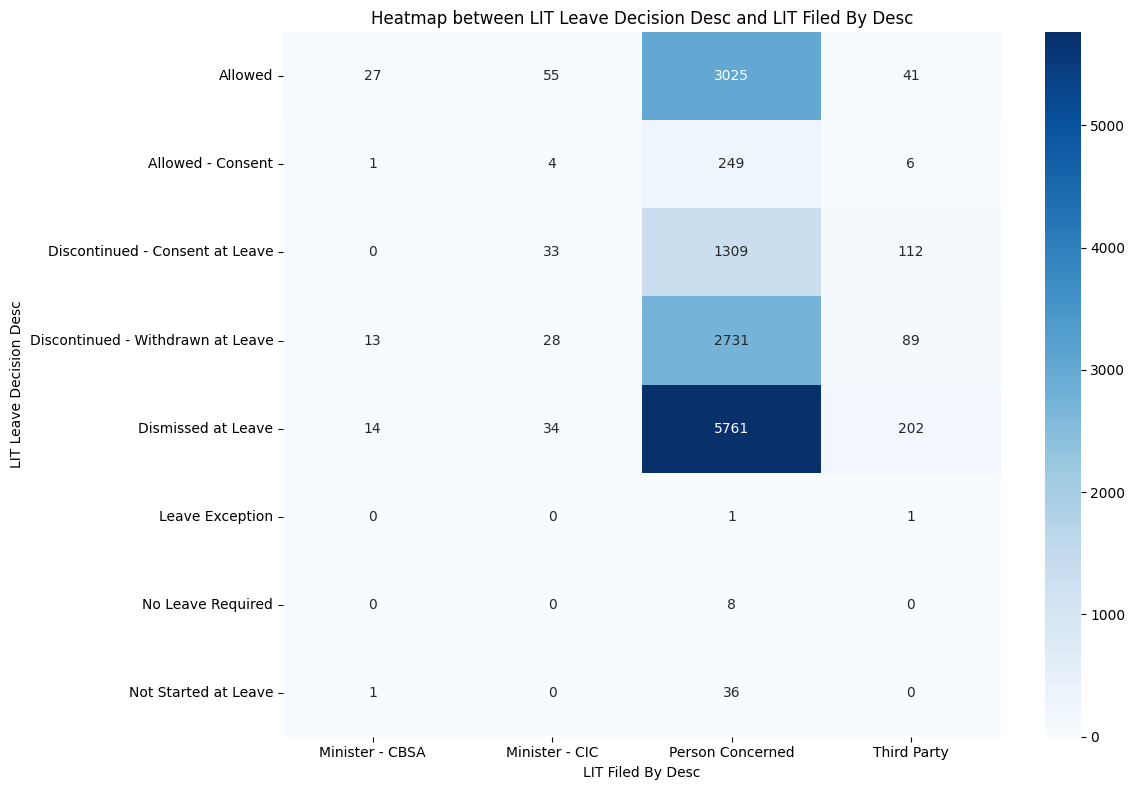

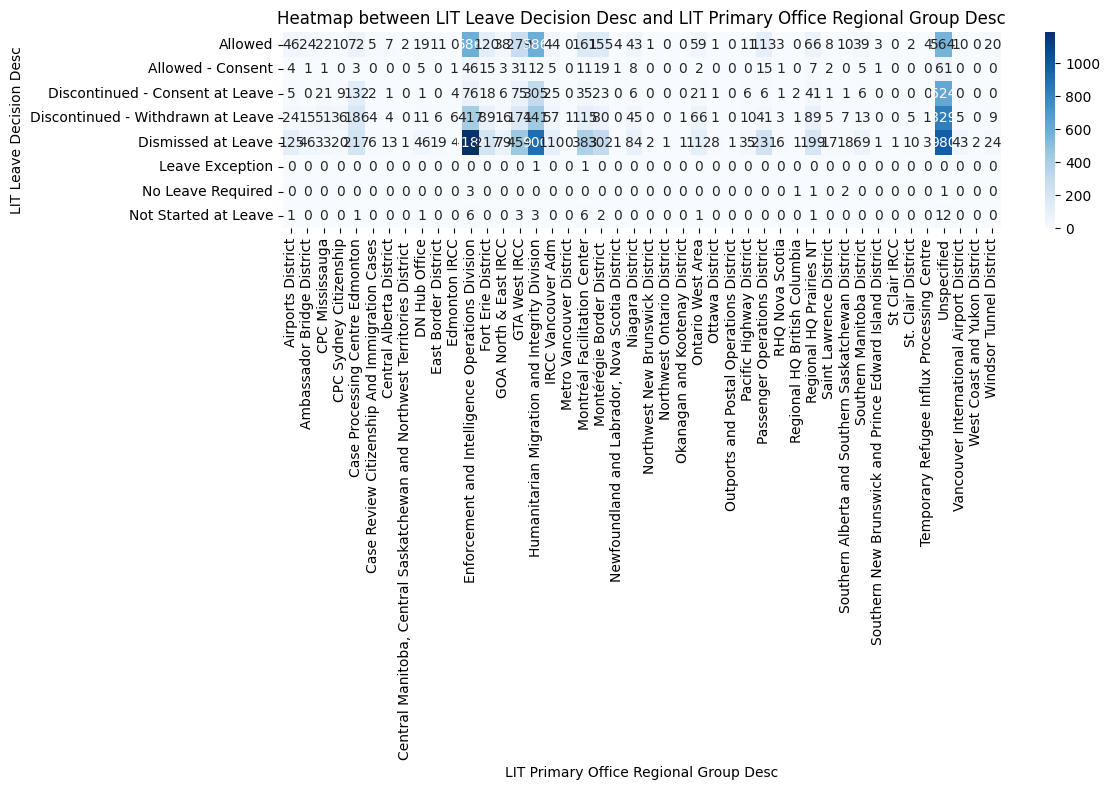

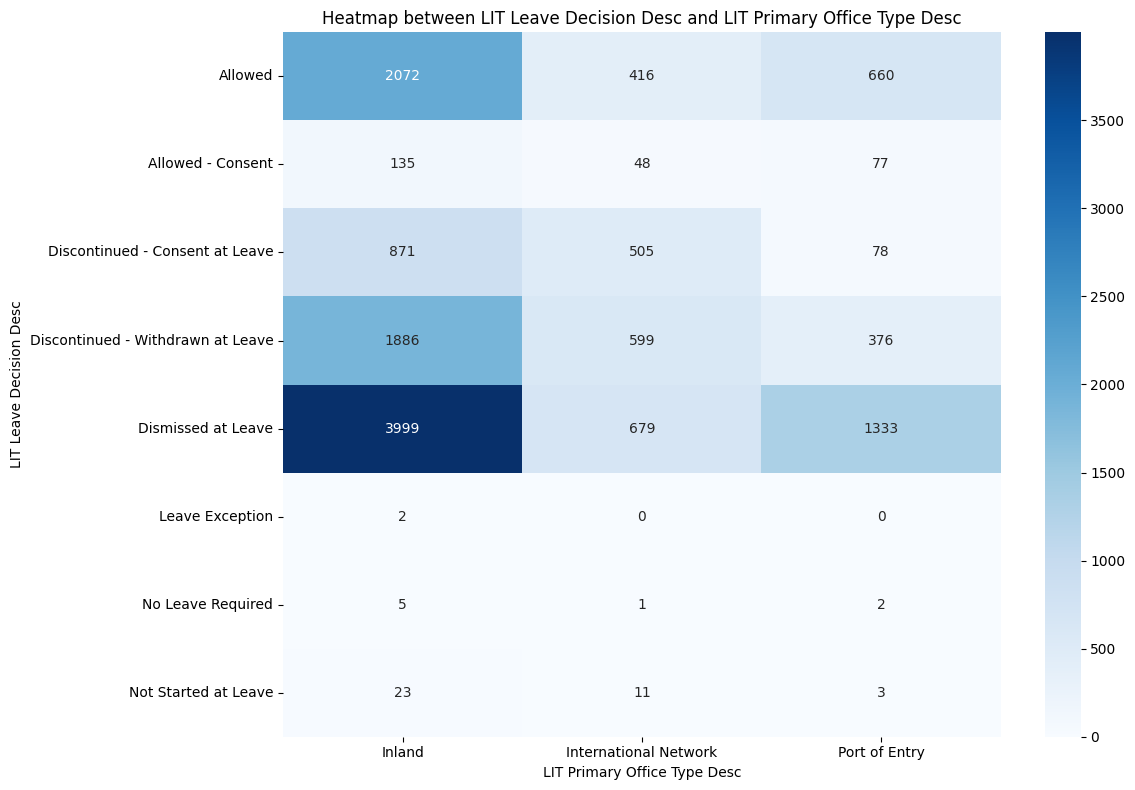

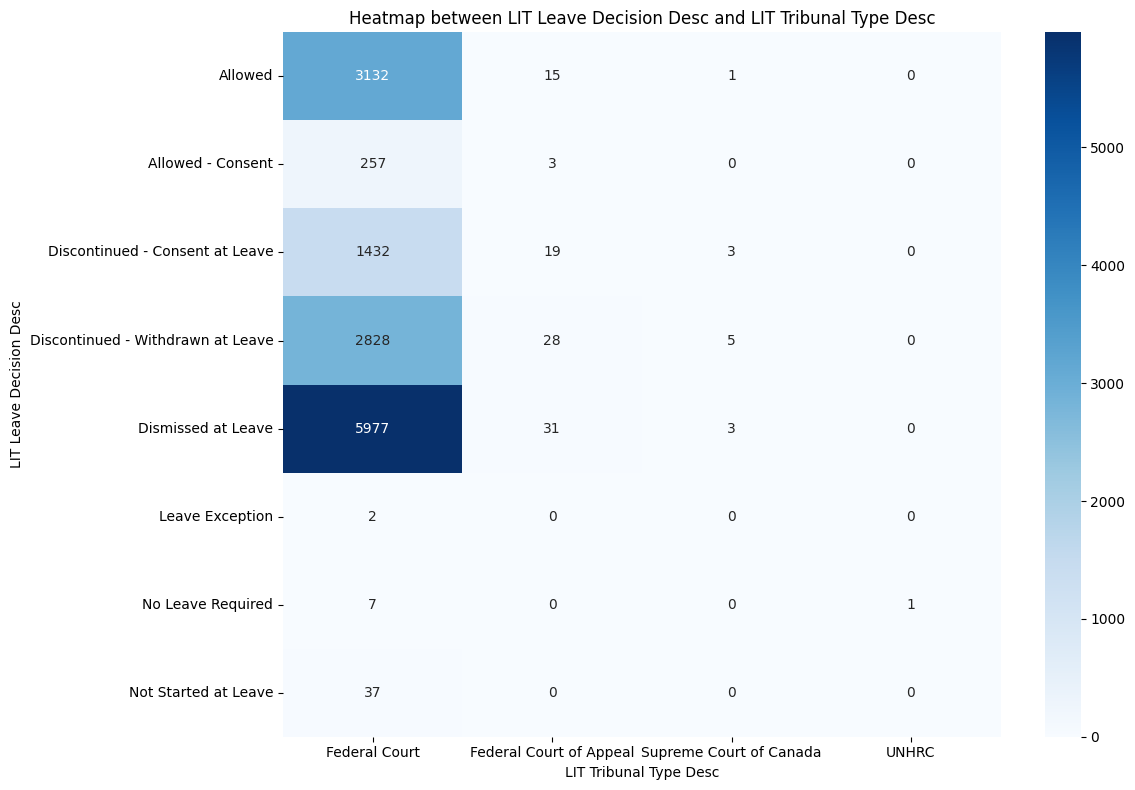

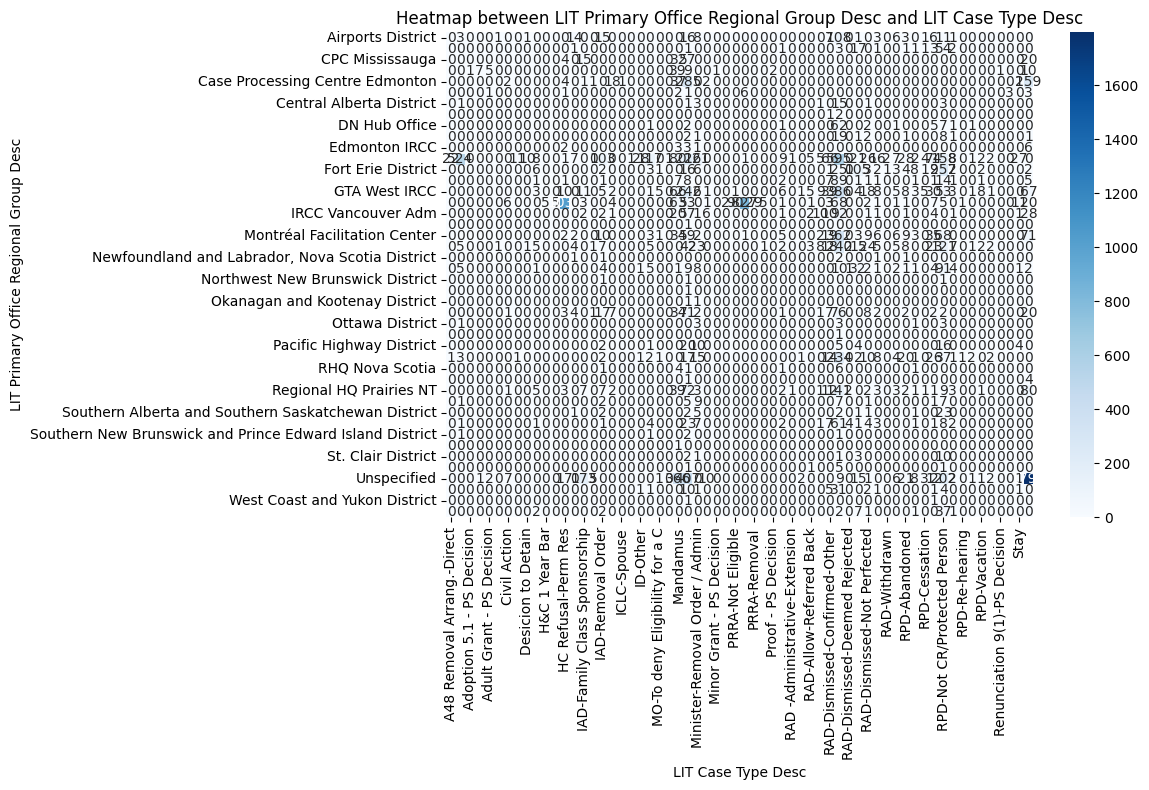

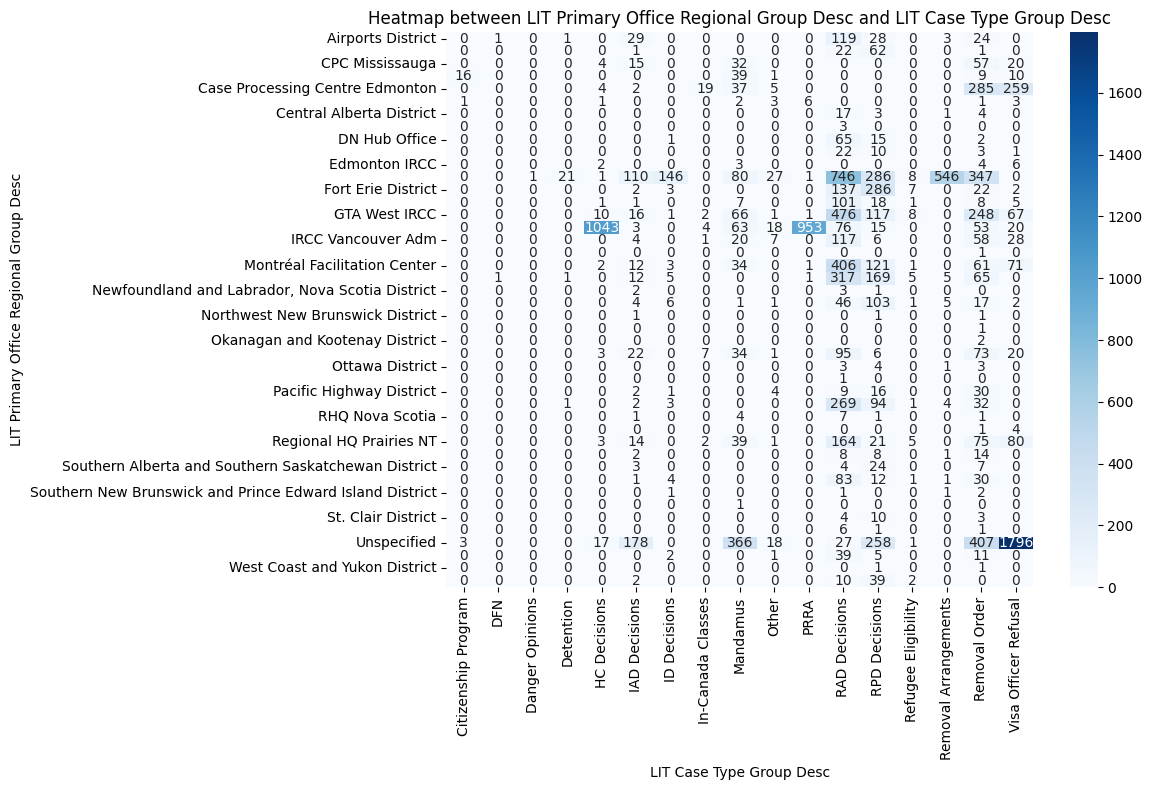

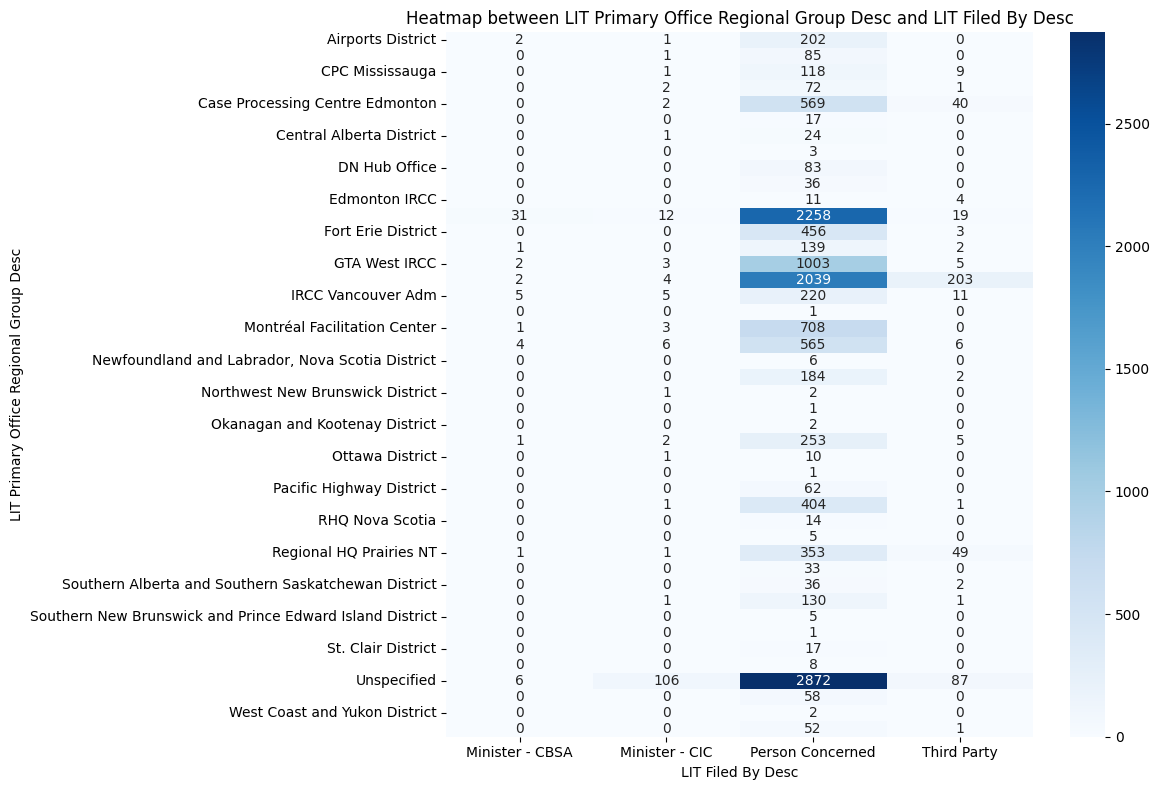

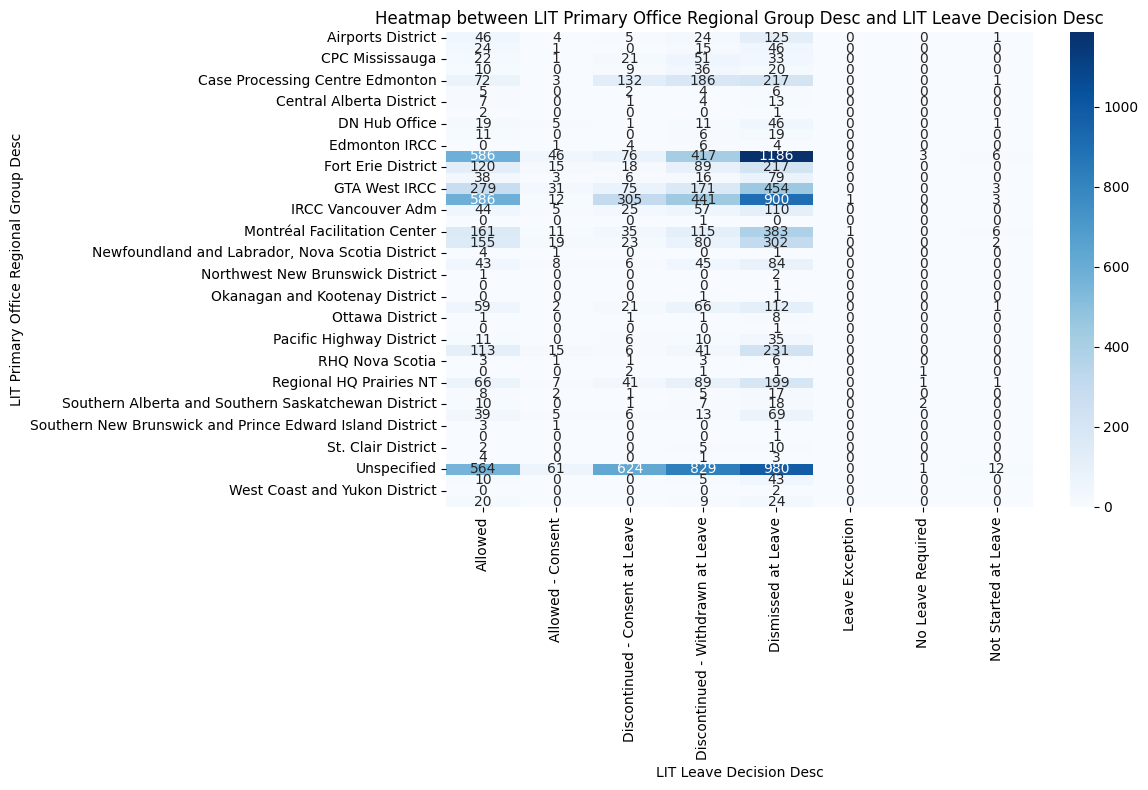

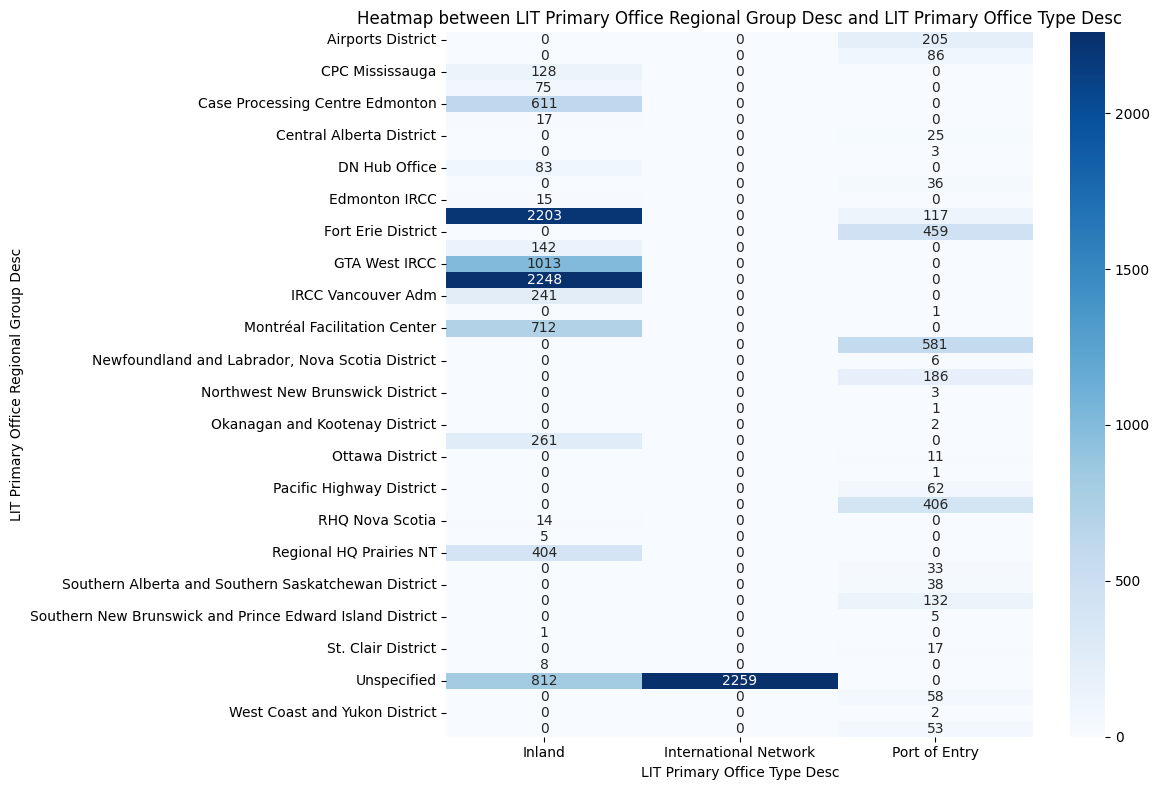

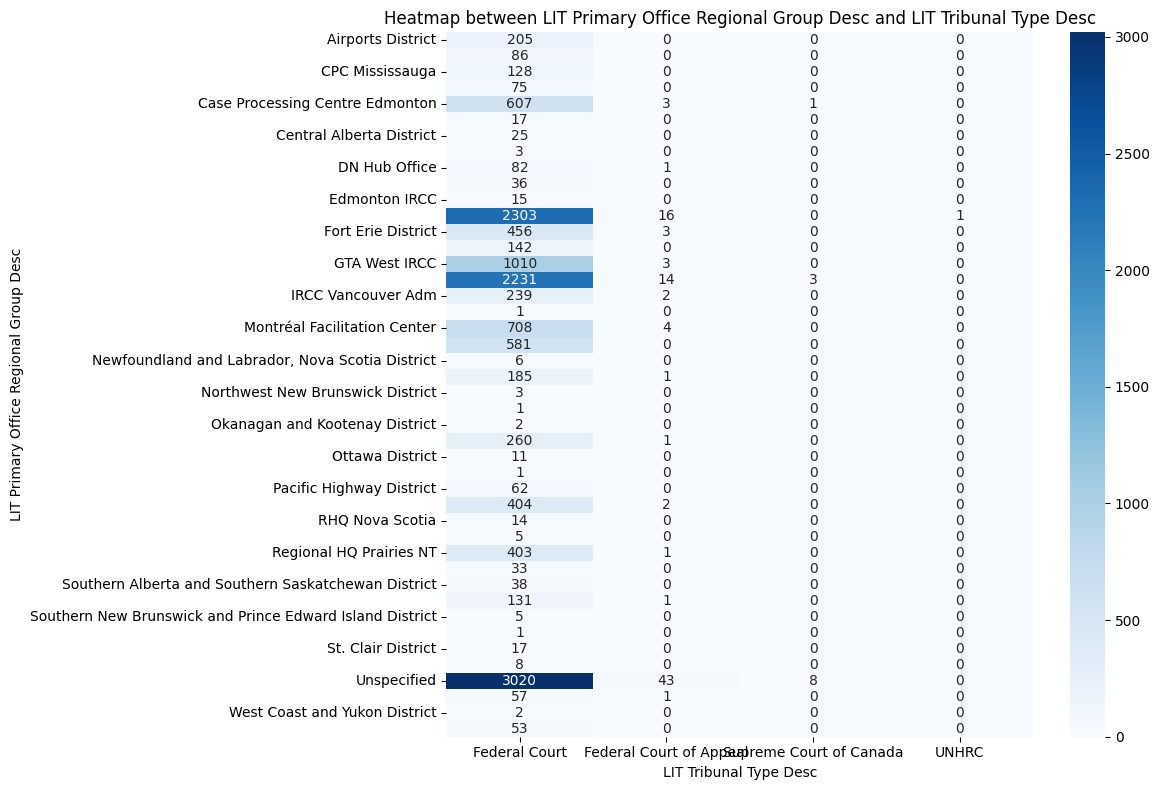

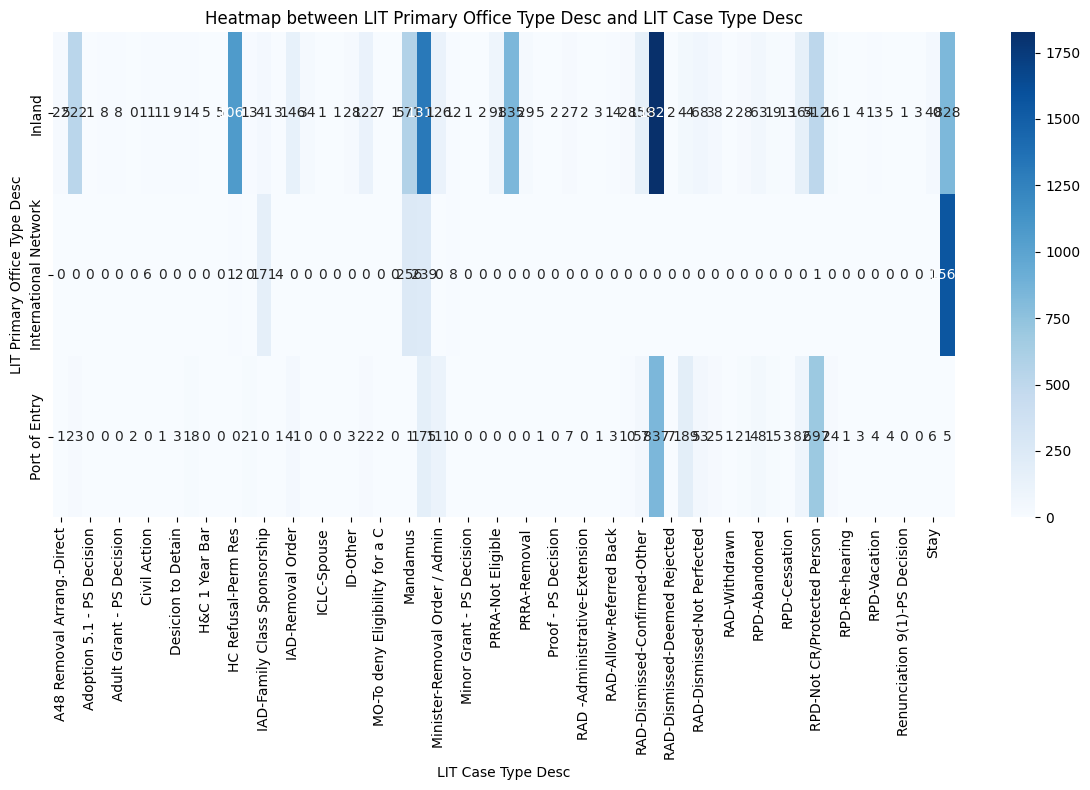

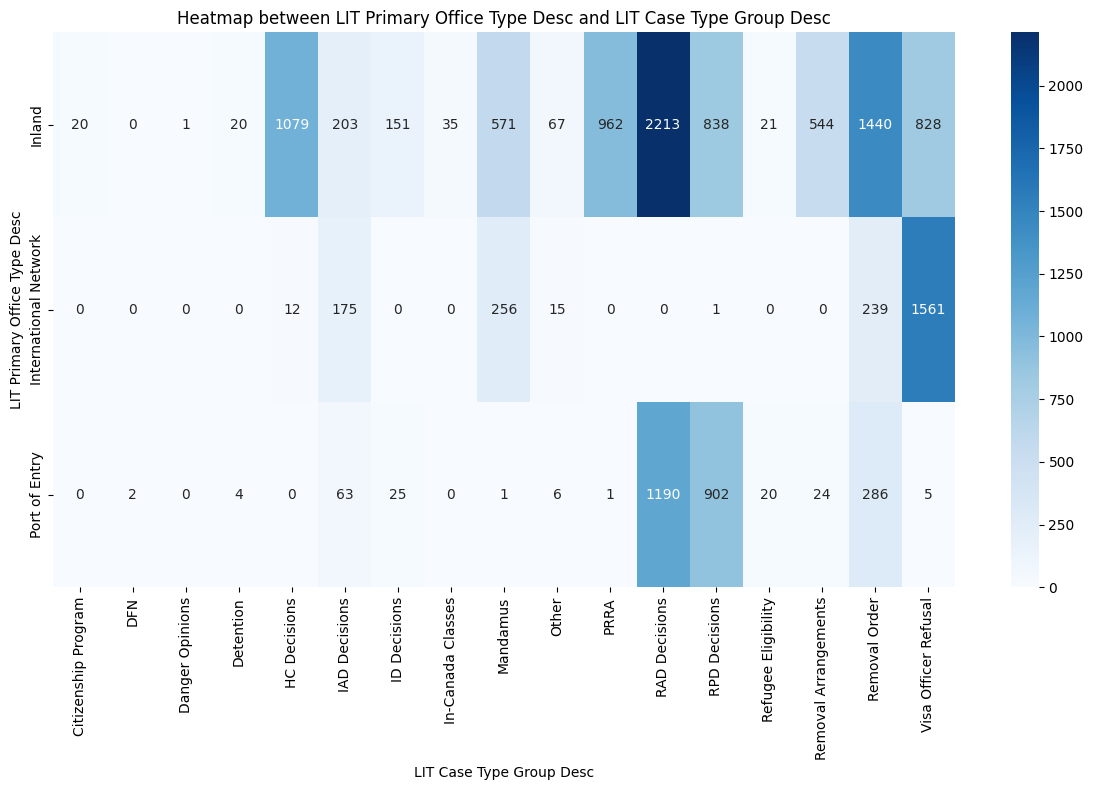

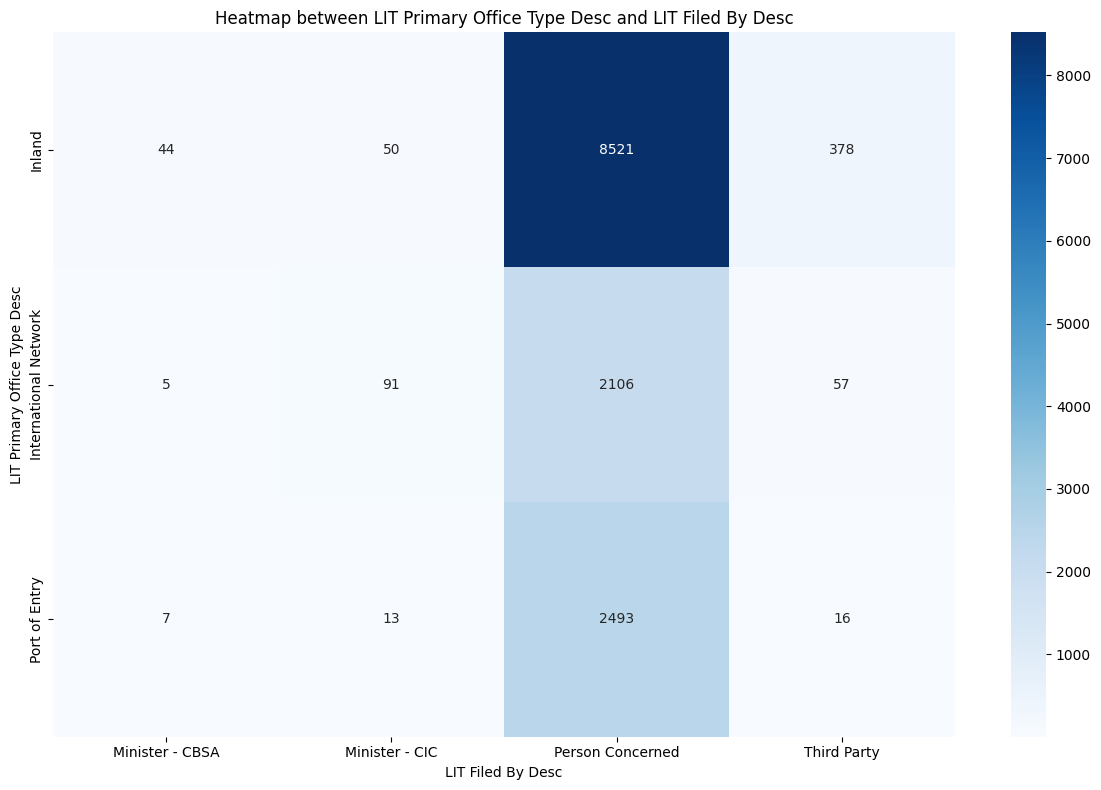

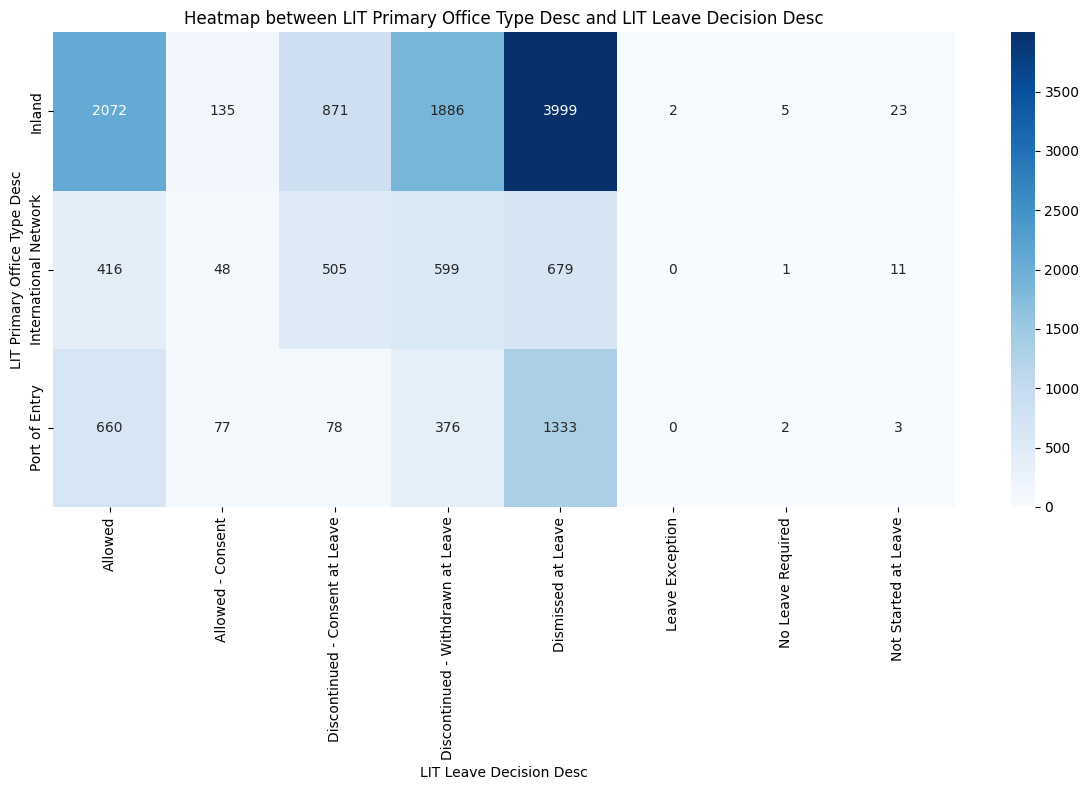

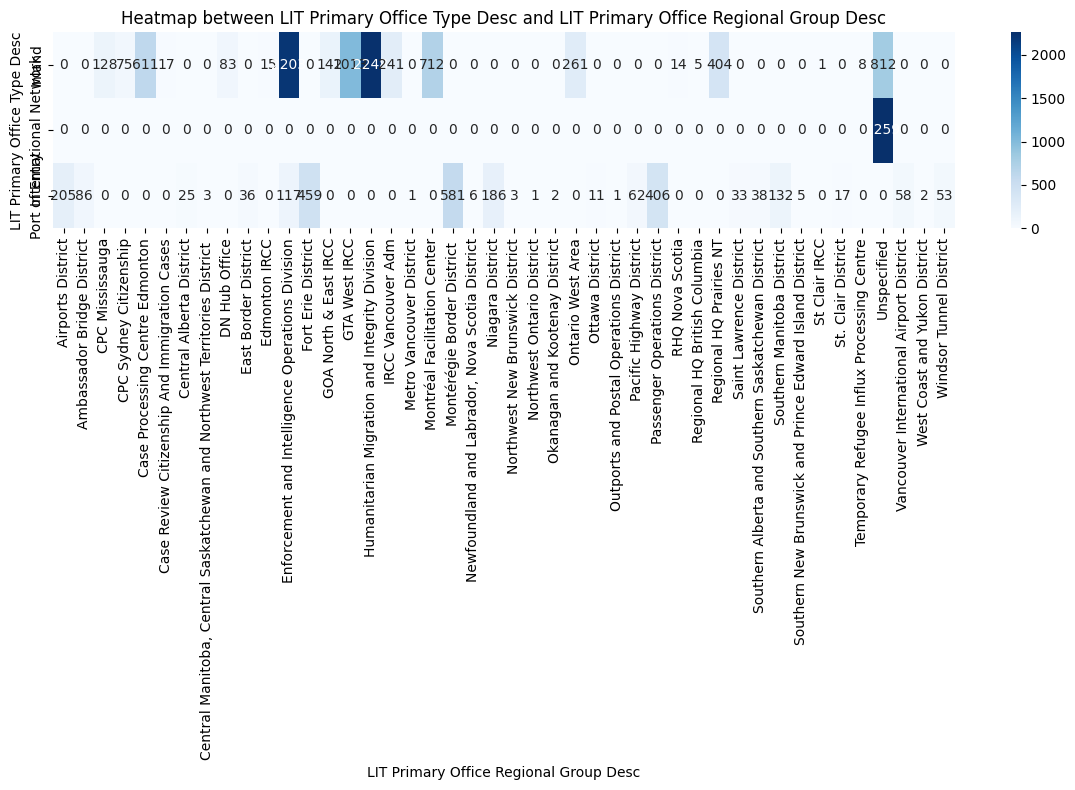

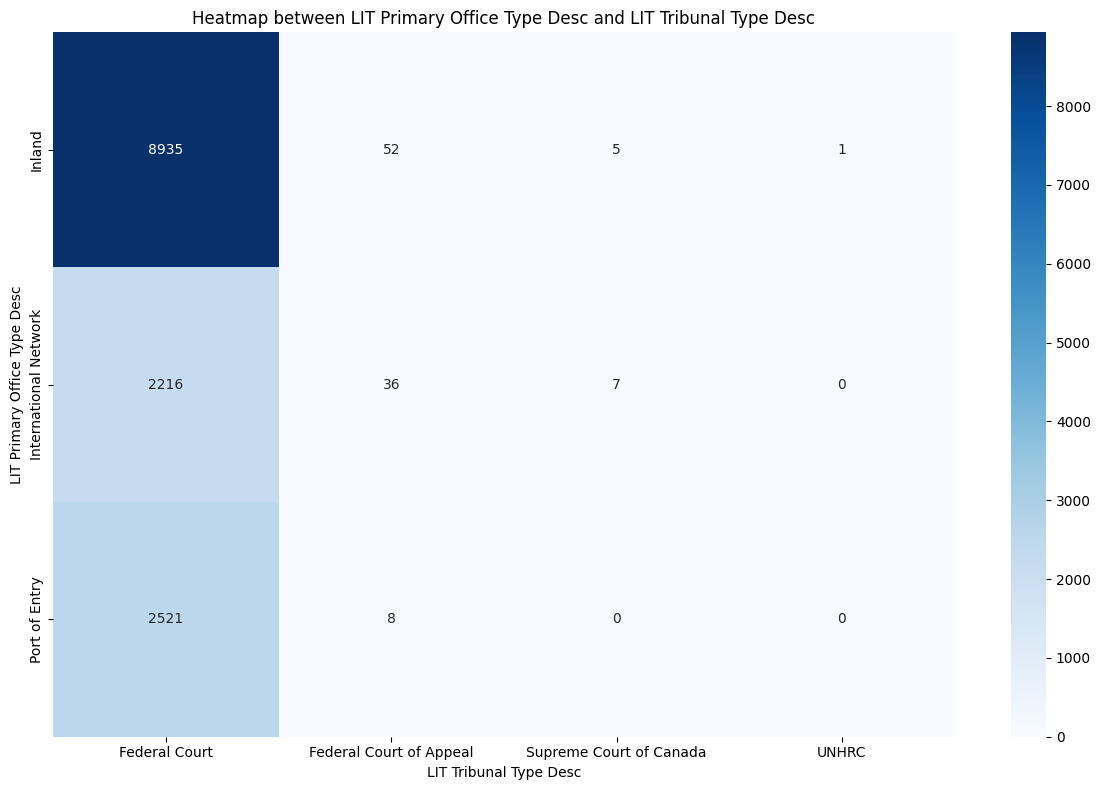

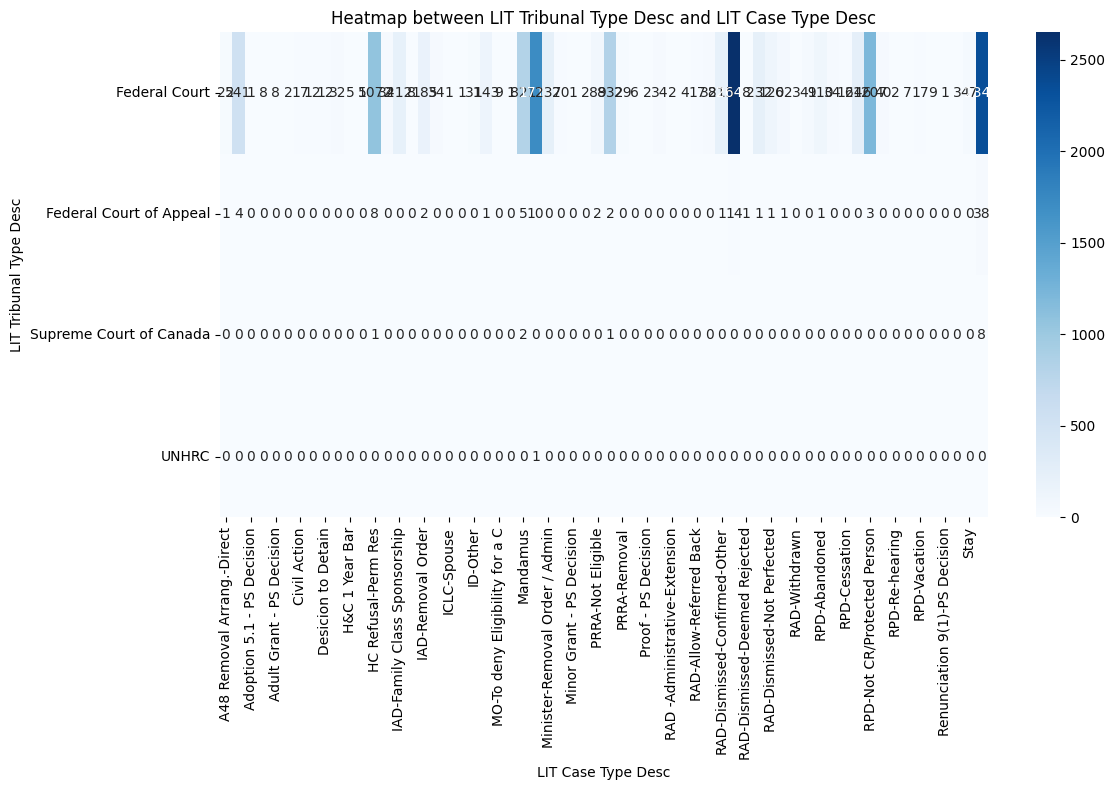

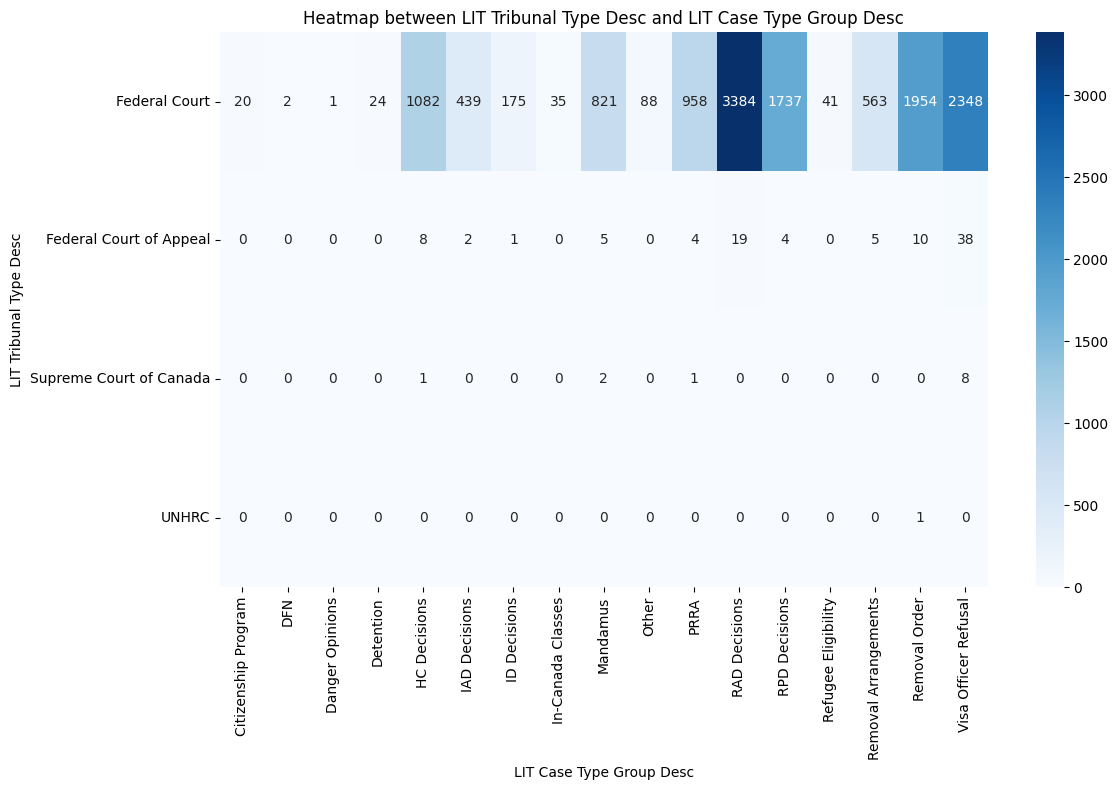

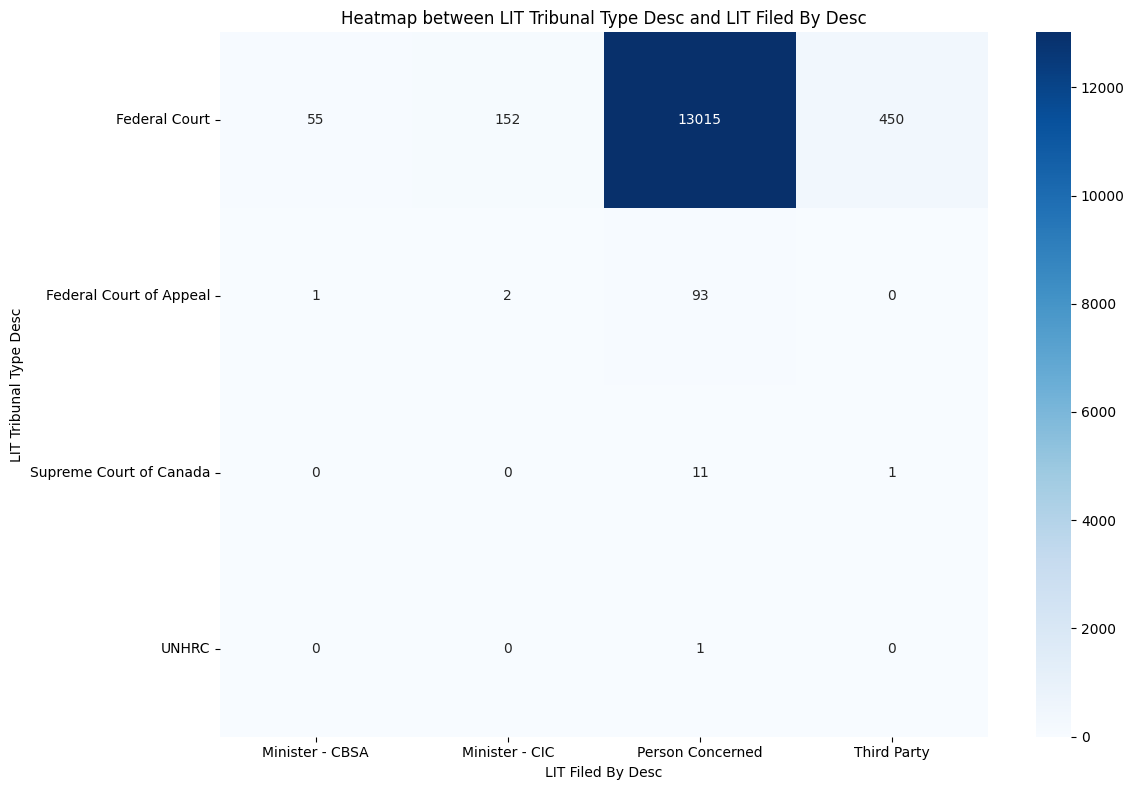

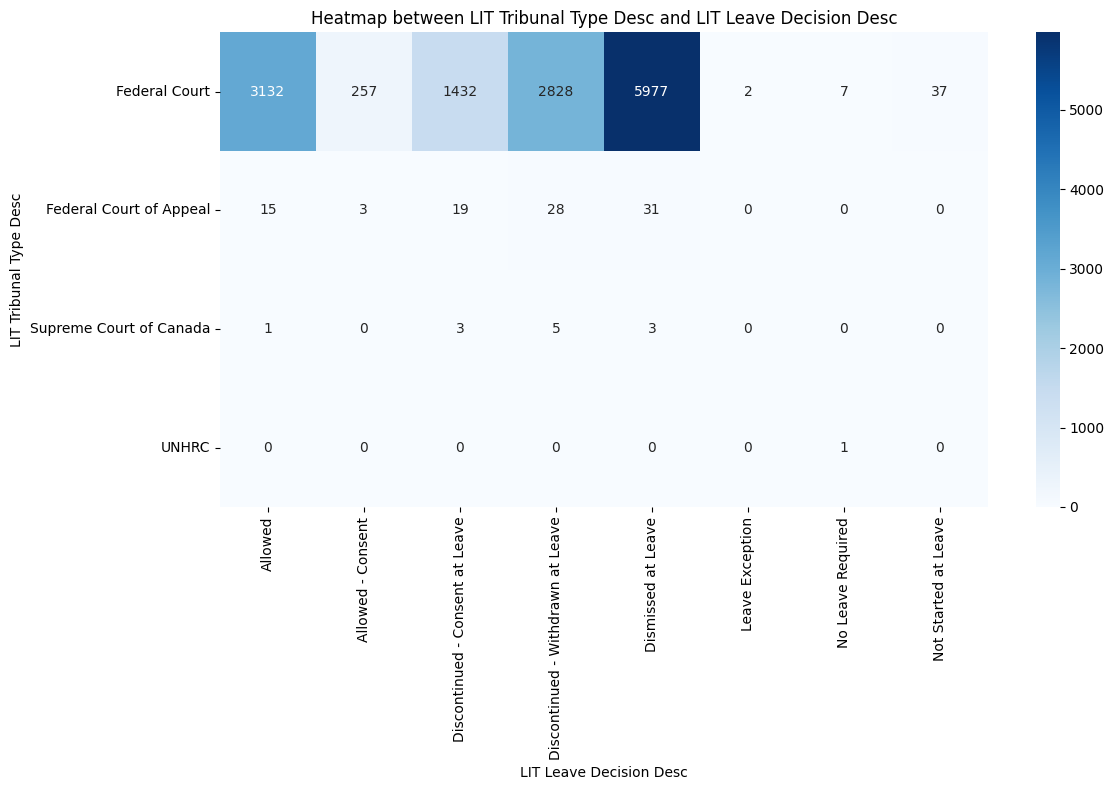

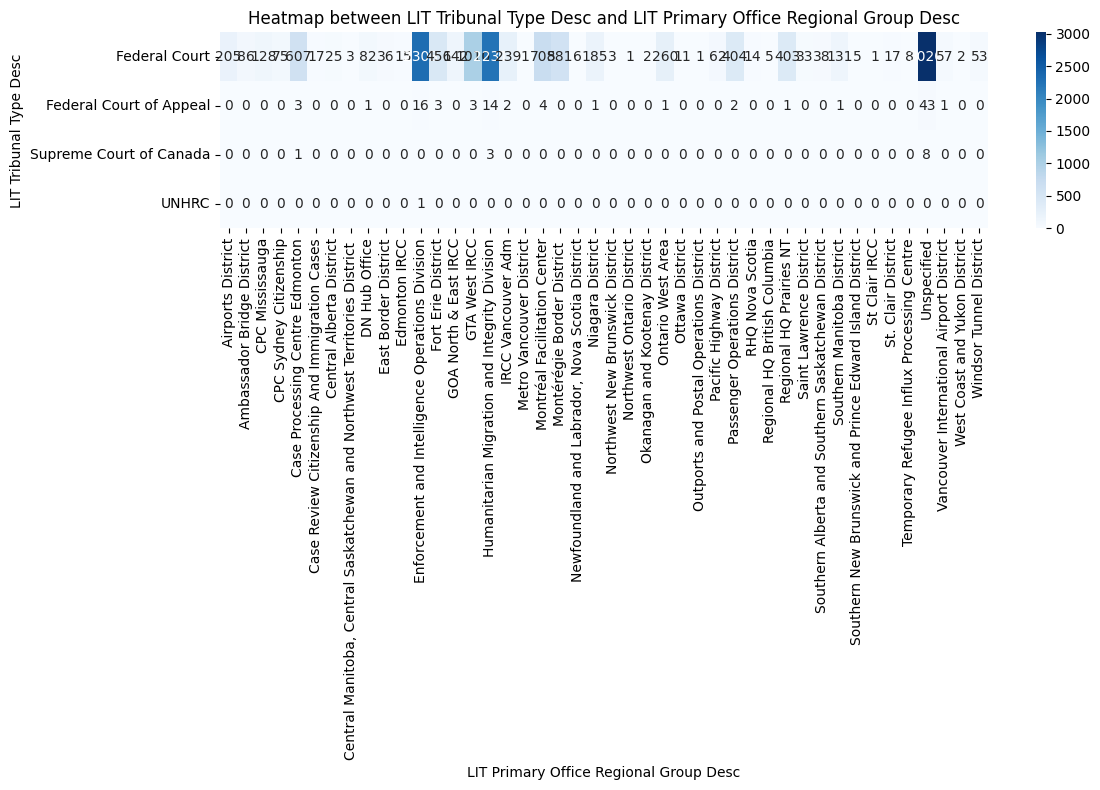

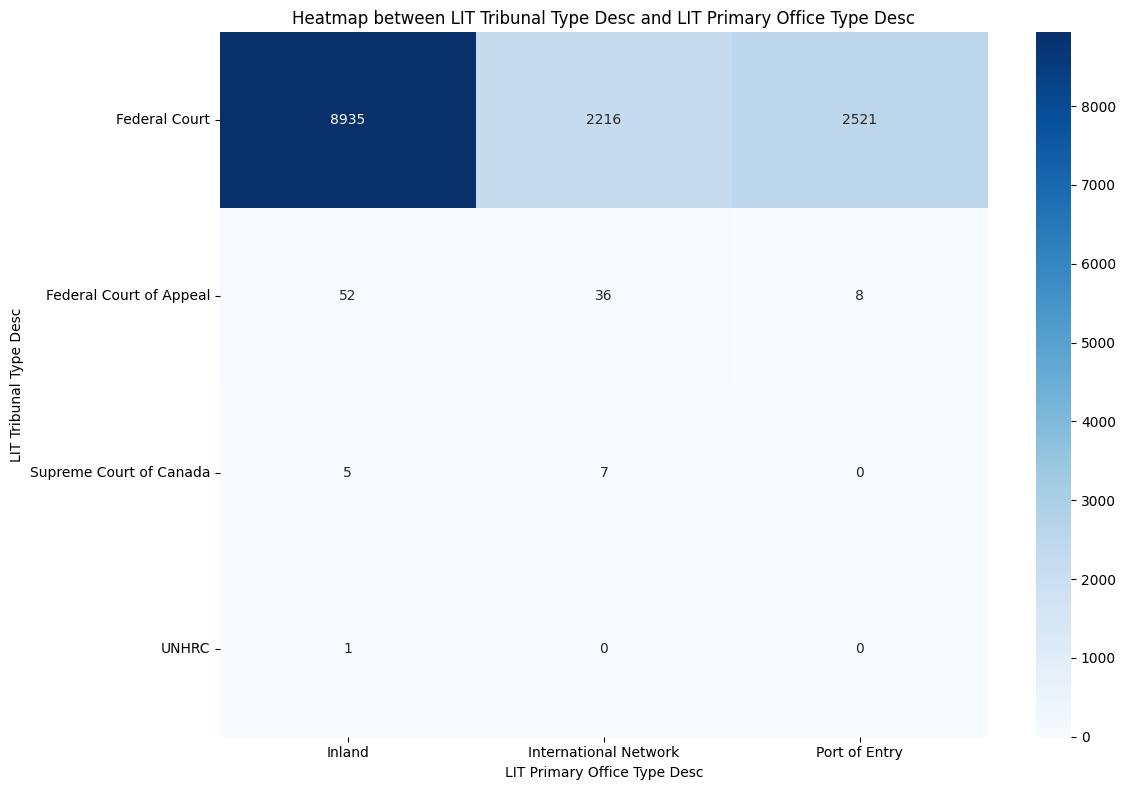

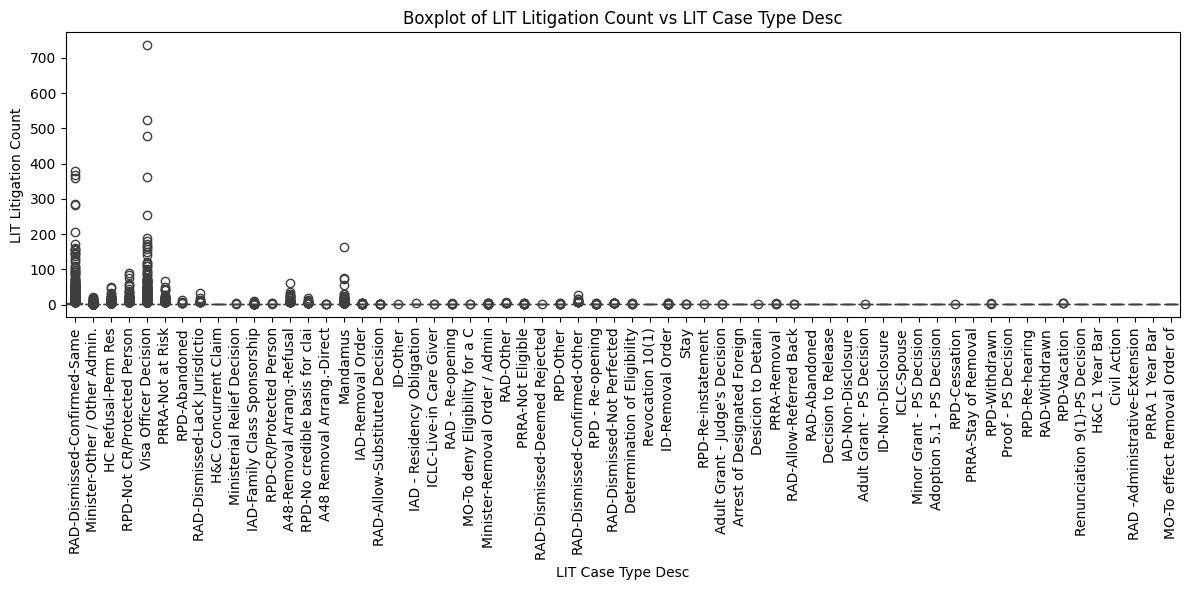

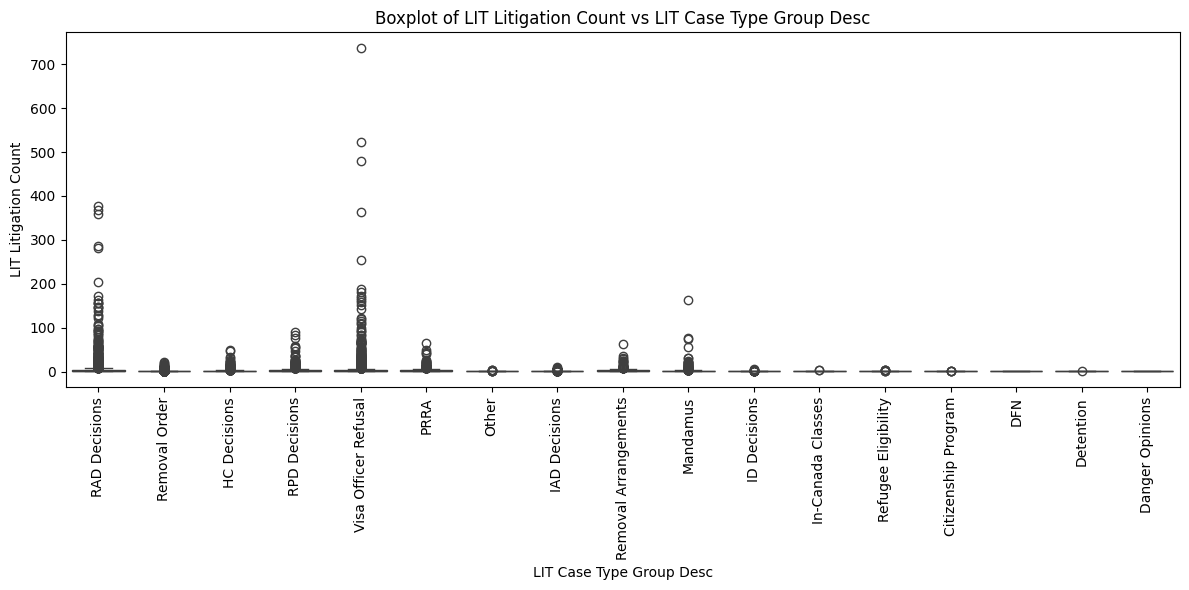

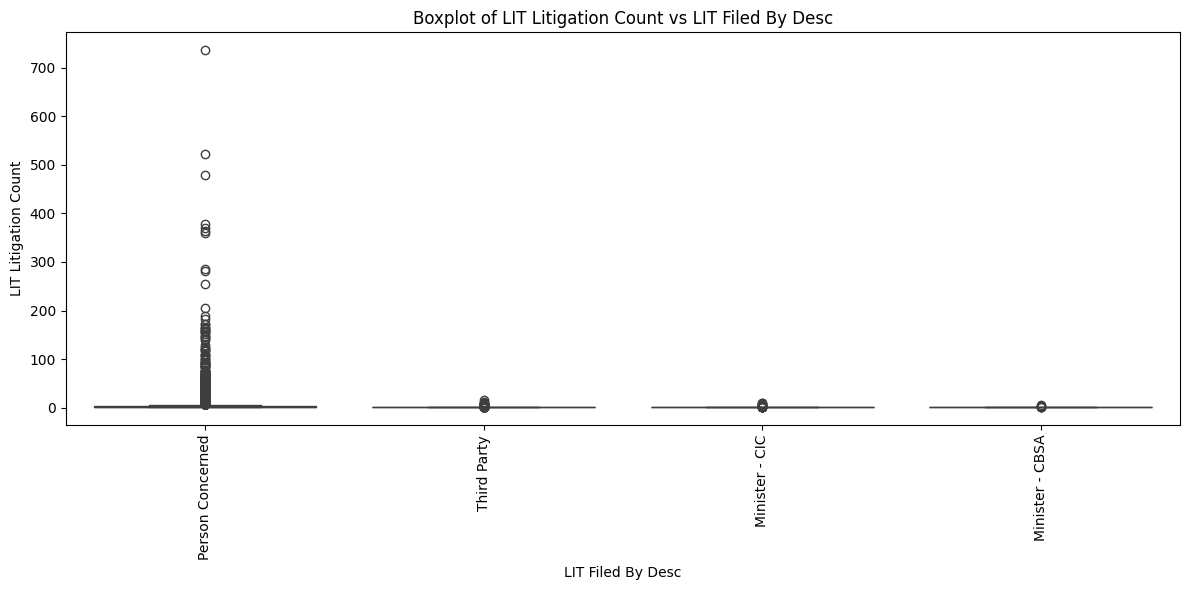

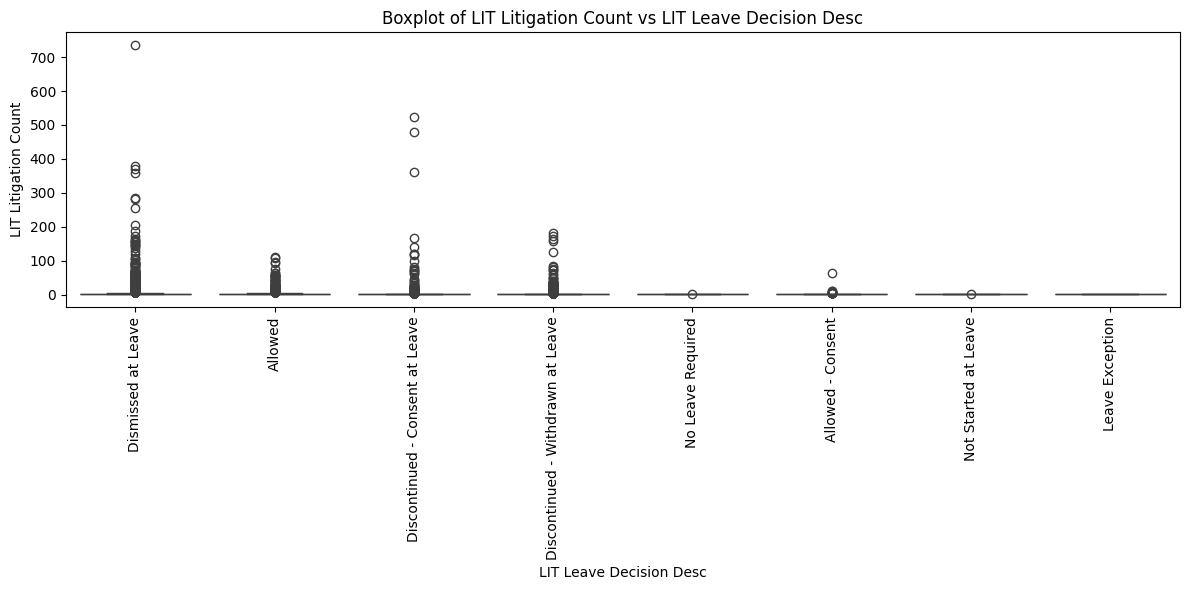

/var/folders/jm/vq4rdv3n6m98v4n_yykz5l6r0000gn/T/ipykernel_6848/177600323.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


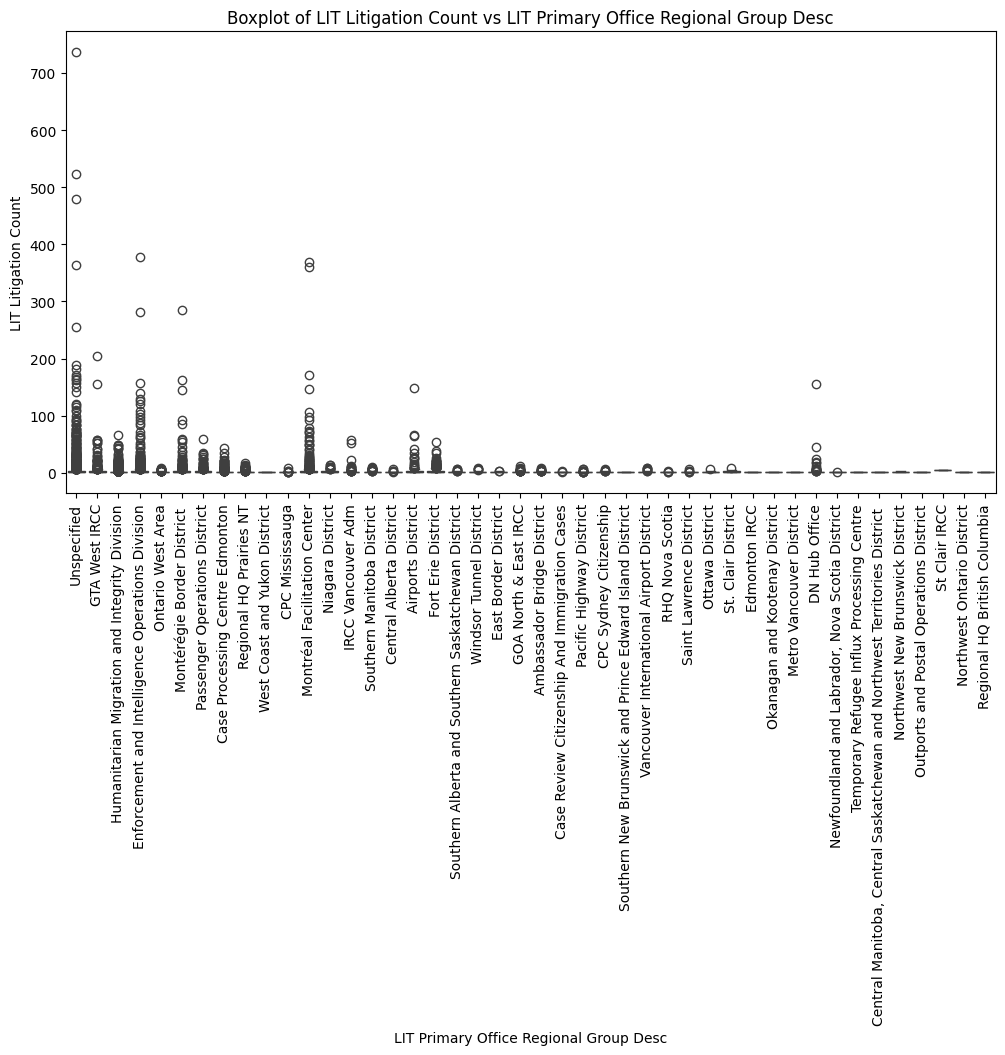

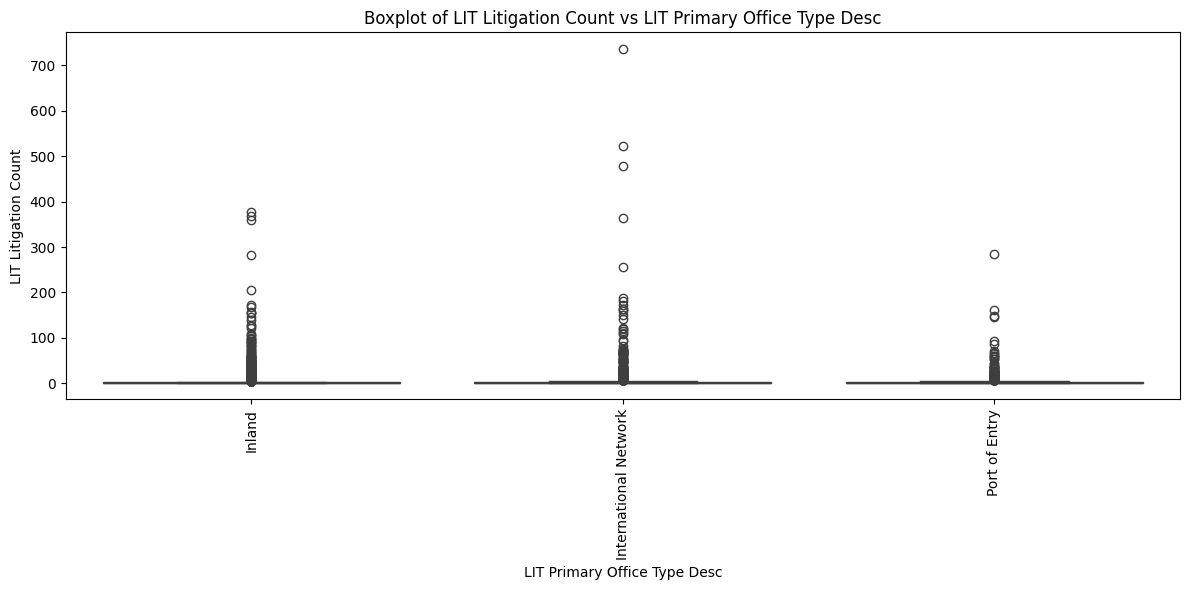

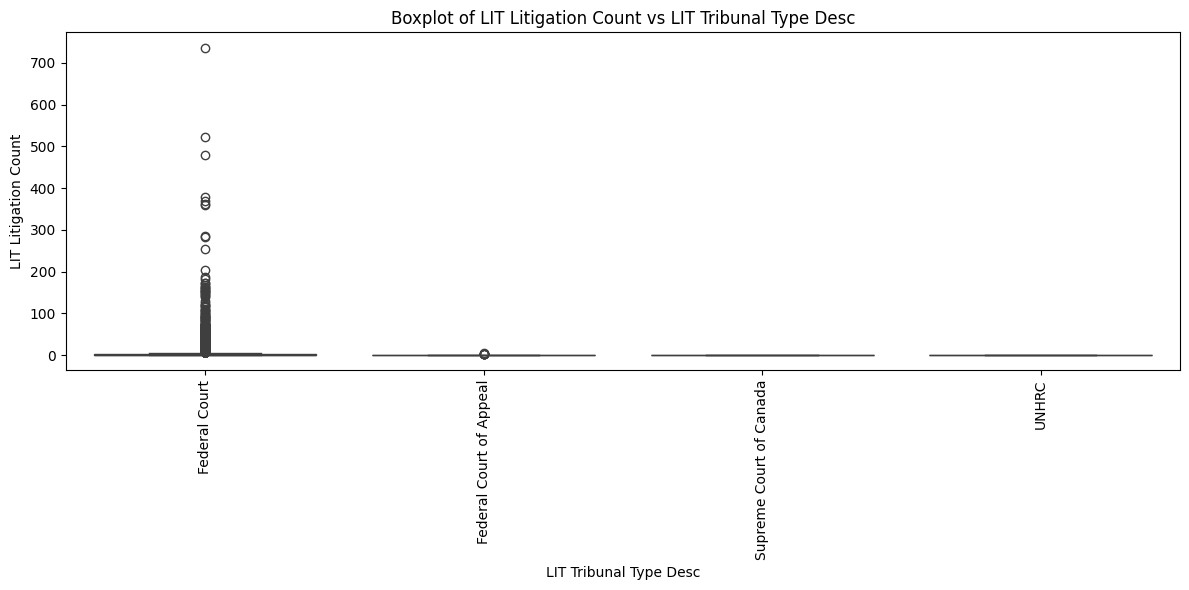

In [12]:
top_categories = df['Country of Citizenship'].value_counts().head(10).index

# 1. Analyze 'Country of Citizenship' with its top 10 values only
country_of_citizenship_data = df[df['Country of Citizenship'].isin(top_categories)]
plt.figure(figsize=(12, 6))
sns.countplot(x='Country of Citizenship', data=country_of_citizenship_data, order=top_categories)
plt.title('Top 10 Countries of Citizenship')
plt.xticks(rotation=90)
plt.tight_layout()

# 2. For other categorical columns, check relationship using cross-tabulation and plot heatmap
categorical_columns = df.select_dtypes(include='object').columns.difference(['Country of Citizenship'])

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cross_tab = pd.crosstab(df[col1], df[col2])
            plt.figure(figsize=(12, 8))
            sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
            plt.title(f"Heatmap between {col1} and {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.tight_layout()
            plt.show()

# 3. Analyze relationship between categorical features and LIT Litigation Count
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y="LIT Litigation Count", data=df)
    plt.title(f"Boxplot of LIT Litigation Count vs {column}")
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()


# More Analysis on Trend...

In [13]:
# sum of LIT Litigation Count per year
top_year = df.groupby('LIT Leave Decision Date - Year')['LIT Litigation Count'].sum()
top_year

LIT Leave Decision Date - Year
2018    6621
2019    8277
2020    5249
2021    9625
2022    9473
2023    9063
Name: LIT Litigation Count, dtype: int64

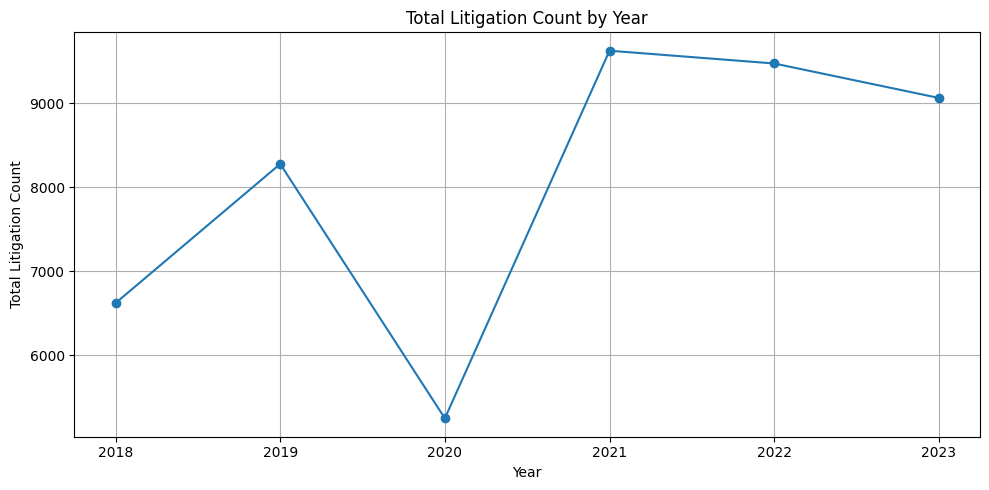

In [14]:
# making a line chart to see trend
import matplotlib.pyplot as plt

top_year.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Total Litigation Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Litigation Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Question to explore: what happened in 2020? COVID?

In [15]:
# total litigation volume per country
top_volume = df.groupby('Country of Citizenship')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_volume

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
                              ... 
Iceland                          1
Bhutan                           1
Vanuatu                          1
Macao SAR                        1
Solomons, The                    1
Name: LIT Litigation Count, Length: 180, dtype: int64

In [16]:
# trying to understand what types of decisions are made
top_decs = df.groupby('LIT Leave Decision Desc')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_decs

LIT Leave Decision Desc
Dismissed at Leave                   24843
Allowed                               9000
Discontinued - Withdrawn at Leave     8007
Discontinued - Consent at Leave       5923
Allowed - Consent                      486
Not Started at Leave                    38
No Leave Required                        9
Leave Exception                          2
Name: LIT Litigation Count, dtype: int64

In [17]:
# creating a subset of the data for the top 10 countries
top_volume.head(10)

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
Mexico                        2004
Haiti                         1658
Colombia                      1479
United States of America       901
Philippines                    660
Name: LIT Litigation Count, dtype: int64

In [18]:
top_10_countries = [
    'Nigeria', 'India', 'Iran', "People's Republic of China", 'Pakistan',
    'Mexico', 'Haiti', 'Colombia', 'United States of America', 'Philippines'
]

top10 = df[df['Country of Citizenship'].isin(top_10_countries)]

In [19]:
top_10 = top10.copy()

To have a closer look into COVID 

In [20]:
def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021]:
        return 'COVID'
    elif year in [2022,  2023]:
        return 'Post-COVID'
    else:
        return 'Other'

top_10['Period'] = top_10.index.to_series().astype(int).apply(classify_period)

In [21]:
top_10

Country of Citizenship  \
LIT Leave Decision Date - Year                               
2018                            People's Republic of China   
2018                                              Pakistan   
2018                                                 India   
2018                                              Colombia   
2018                                              Colombia   
...                                                    ...   
2023                                                Mexico   
2023                                              Pakistan   
2023                                                 India   
2023                                                 India   
2023                                               Nigeria   

                                          LIT Leave Decision Desc  \
LIT Leave Decision Date - Year                                      
2018                                           Dismissed at Leave   
2018                                           Dismissed at Leave   
2018                              Discontinued - Consent at Leave   
2018                            Discontinued - Withdrawn at Leave   
2018                                                      Allowed   
...                                                           ...   
2023                              Discontinued - Consent at Leave   
2023                                           Dismissed at Leave   
2023                                           Dismissed at Leave   
2023                            Discontinued - Withdrawn at Leave   
2023                              Discontinued - Consent at Leave   

                               LIT Case Type Group Desc  \
LIT Leave Decision Date - Year                            
2018                                      RAD Decisions   
2018                                      RAD Decisions   
2018                               Visa Officer Refusal   
2018                                      Removal Order   
2018                                      RPD Decisions   
...                                                 ...   
2023                               Visa Officer Refusal   
2023                                      RAD Decisions   
2023                                      Removal Order   
2023                                      Removal Order   
2023                               Removal Arrangements   

                                            LIT Case Type Desc  \
LIT Leave Decision Date - Year                                   
2018                              RAD-Dismissed-Confirmed-Same   
2018                              RAD-Dismissed-Confirmed-Same   
2018                                     Visa Officer Decision   
2018                             Minister-Other / Other Admin.   
2018                               RPD-Not CR/Protected Person   
...                                                        ...   
2023                                     Visa Officer Decision   
2023                            RAD-Dismissed-Lack Jurisdictio   
2023                            Minister-Removal Order / Admin   
2023                             Minister-Other / Other Admin.   
2023                               A48-Removal Arrang.-Refusal   

                               LIT Filed By Desc LIT Tribunal Type Desc  \
LIT Leave Decision Date - Year                                            
2018                            Person Concerned          Federal Court   
2018                            Person Concerned          Federal Court   
2018                                 Third Party          Federal Court   
2018                            Person Concerned          Federal Court   
2018                            Person Concerned          Federal Court   
...                                          ...                    ...   
2023                            Person Concerned          Federal Court   
2023                         

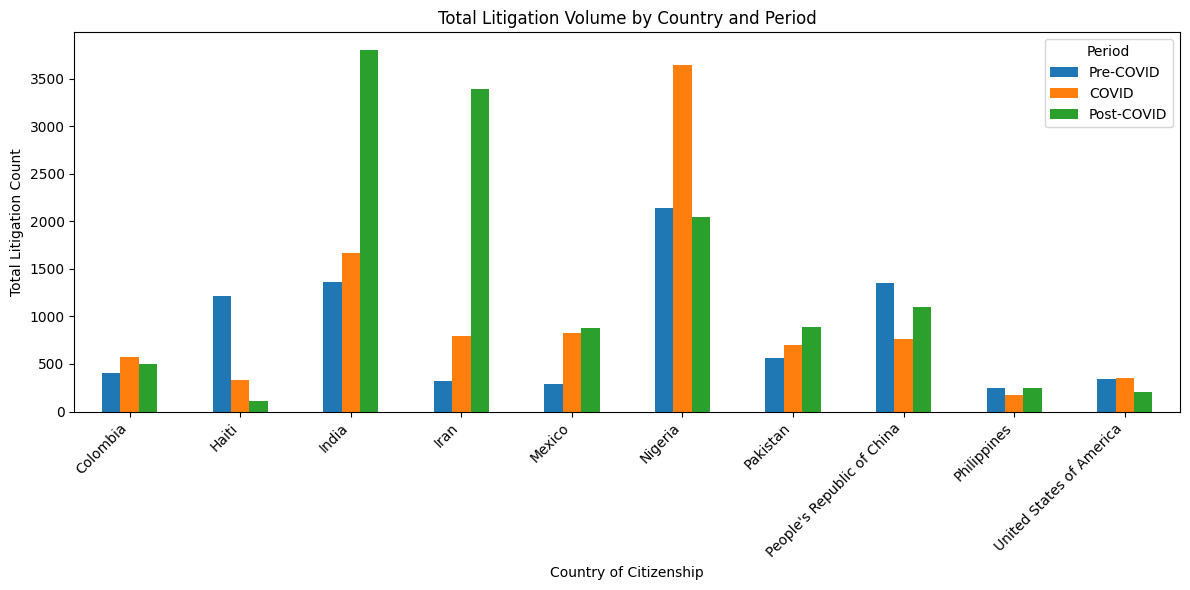

In [22]:
import matplotlib.pyplot as plt

grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Litigation Volume by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.tight_layout()
plt.show()

Insights: different patterns accross the countries 

India & Iran: surged post covid

Nigeria: spiked during covid and reduced after

China: declined during covid and bounced back after

In [23]:
# group by country and period, sum litigation count
grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce order
)

# normalize so each country's total = 1
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)

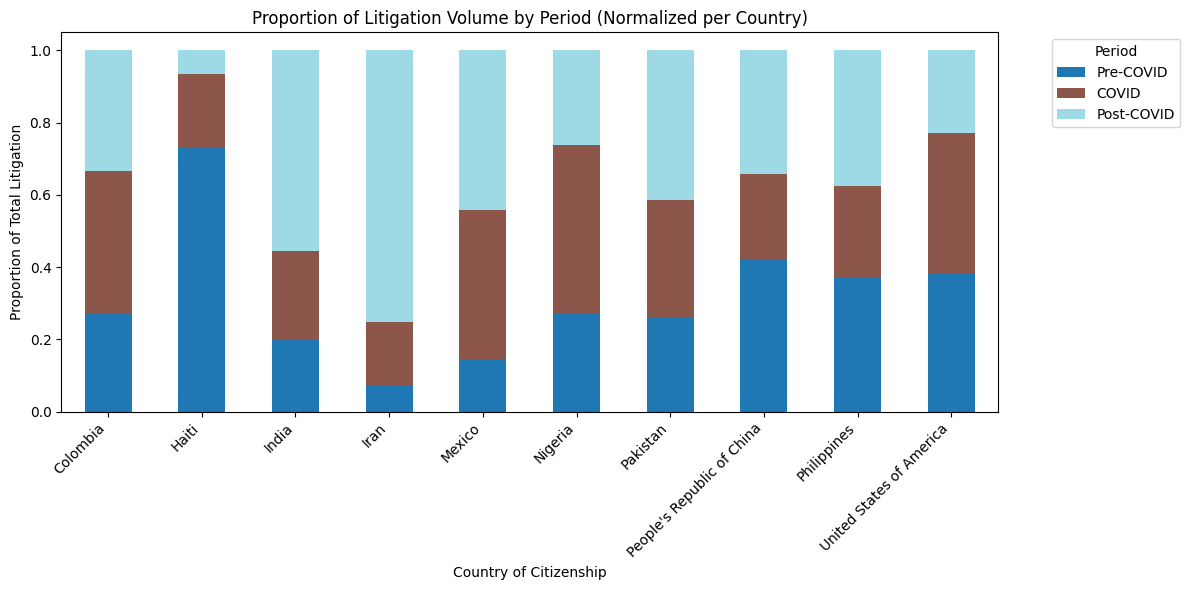

In [24]:
# plot normalized as stacked bar chart
grouped_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Proportion of Litigation Volume by Period (Normalized per Country)')
plt.xlabel('Country of Citizenship')
plt.ylabel('Proportion of Total Litigation')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Next steps: Compare countries, i.e. India & Nigeria

Breakdown Leave Decision

In [25]:
top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum()

Country of Citizenship    Period      LIT Leave Decision Desc          
Colombia                  COVID       Allowed                              143
                                      Allowed - Consent                      1
                                      Discontinued - Consent at Leave       14
                                      Discontinued - Withdrawn at Leave    129
                                      Dismissed at Leave                   290
                                                                          ... 
United States of America  Post-COVID  Dismissed at Leave                   109
                          Pre-COVID   Allowed                               48
                                      Discontinued - Consent at Leave       10
                                      Discontinued - Withdrawn at Leave     29
                                      Dismissed at Leave                   259
Name: LIT Litigation Count, Length: 164, dtype: int64

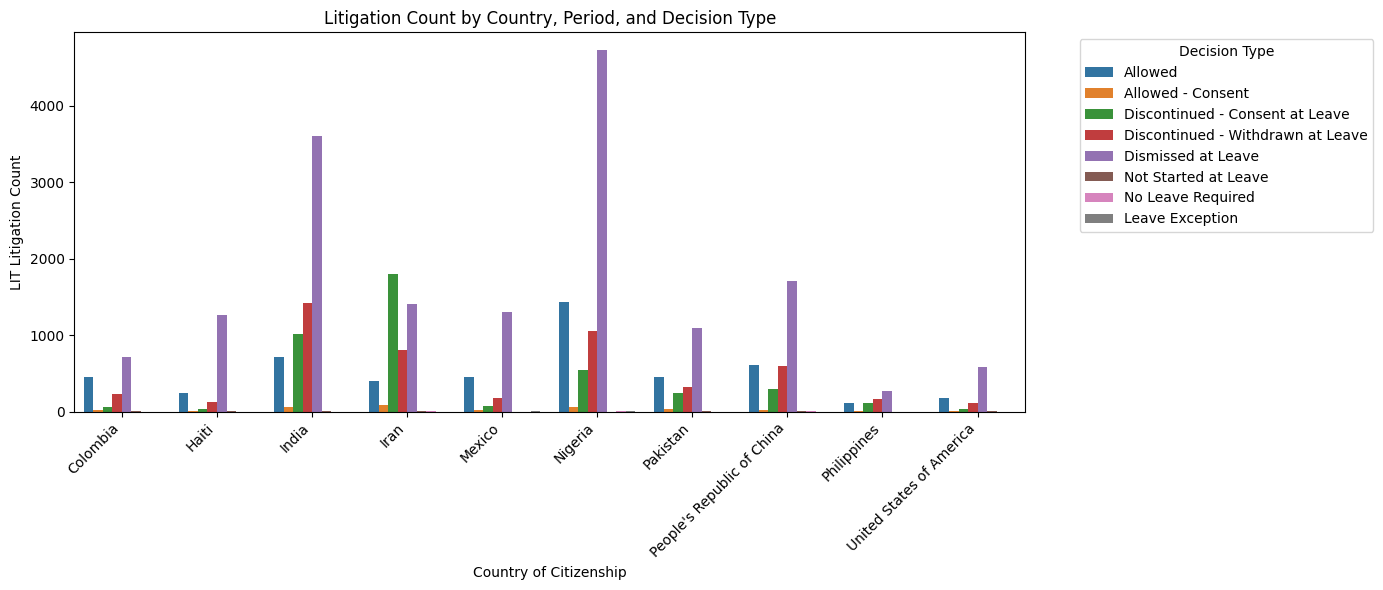

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
# focusing on top 5 decisions

top_5_decisions = (
    top_10['LIT Leave Decision Desc']
    .value_counts()
    .head(5)
    .index.tolist()
)

top_decs = top_10[top_10['LIT Leave Decision Desc'].isin(top_5_decisions)]

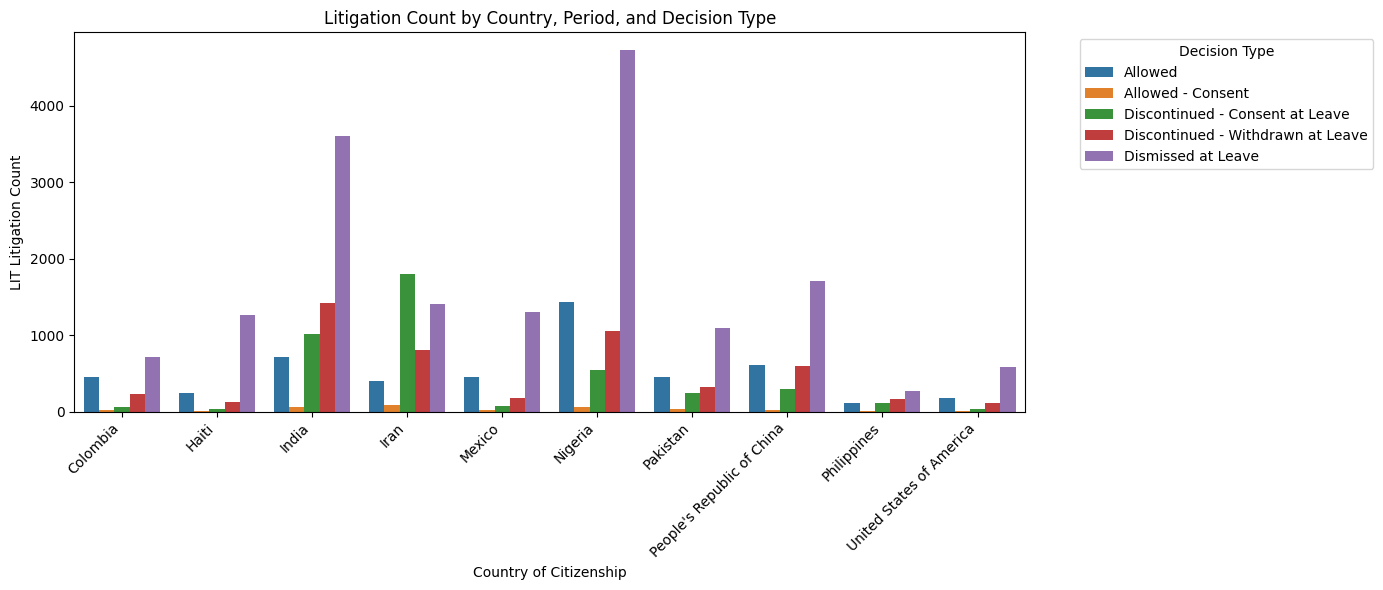

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_decs.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Zooming in to look at India

In [29]:
india_only = top_decs[top_decs['Country of Citizenship'] == 'India']

/var/folders/jm/vq4rdv3n6m98v4n_yykz5l6r0000gn/T/ipykernel_6848/3902524508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_only['Period'] = pd.Categorical(india_only['Period'], categories=period_order, ordered=True)


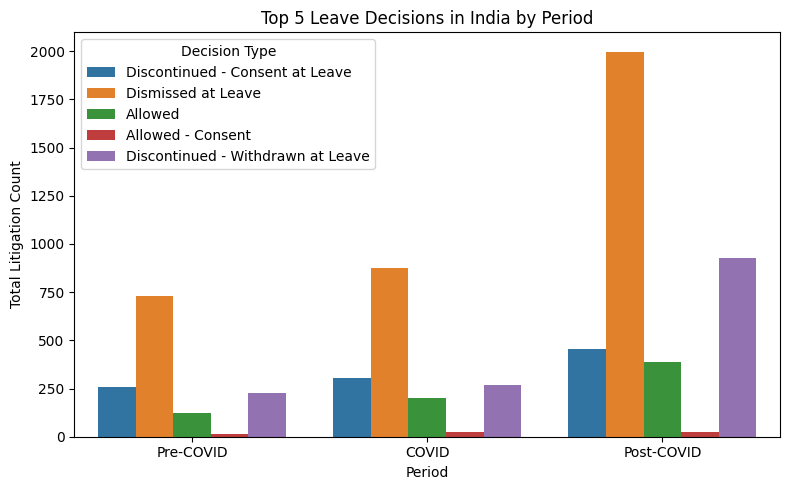

In [30]:
# set categorical order for Period
period_order = ['Pre-COVID', 'COVID', 'Post-COVID']
india_only['Period'] = pd.Categorical(india_only['Period'], categories=period_order, ordered=True)

# plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=india_only,
    x='Period',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Top 5 Leave Decisions in India by Period')
plt.xlabel('Period')
plt.ylabel('Total Litigation Count')
plt.legend(title='Decision Type')
plt.tight_layout()
plt.show()